# Clipboard Health Case Study
## By Oliver Bohler

To begin this project it was essential to do some additional research regarding the effective support of Clipboard Health's staffing strategy. Clipboard operates a nationwide staffing platform, connecting all 50 states. Given the complexity of the U.S. healthcare system, Clipboard Health's sales specialists must navigate a highly dynamic environment where strategic data-driven decision-making can significantly enhance efficiency and success rates. Time is money, especially in sales. To enhance the chance of successful sales approaches, a neccessary step is to get an understanding which states are most likely to need contracted nurses in an attempt to battle staffing shortages.

According to a Health Workforce Analysis published by the Health Resources and Services Administration (HRSA) in November 2022, federal authorities project a shortage of 78,610 full-time RNs in 2025 and a shortage of 63,720 full-time RNs in 2030. The ten states with the largest projected nursing shortage in 2035 are:
- Washington (26%), Georgia (21%), California (18%), Oregon (16%), Michigan (15%)
- Idaho (15%), Louisiana (13%), North Carolina (13%), New Jersey (12%), and South Carolina (11%)
- Source: American Association of Colleges of Nursing

Given this prediction, the goal of this project is to identify states that are more likely to hire contracted nurses, probable causes and indicators for staffing shortages, which nursing jobs are in higher demand and analyze facilities that can be targeted in an effort to enable the Clipboard Health's Sales team to make a data informed approach, utimately increasing the amount of nurses landing a job through the app. 

## Loading the Data
To ensure the dataset is structured properly for analysis, I am first importing the necessary libraries for data cleaning, manipulation, and visualization. Given the complexity and size of the dataset, I am adjusting display settings to enhance readability and facilitate efficient data exploration. This includes configuring Pandas display options to show all columns and rows, ensuring that no critical information is truncated during inspection.

In [308]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import numpy as np

pd.options.display.max_columns = 400
pd.options.display.max_rows = 400

pbj = pd.read_csv('/Users/oliverbohler/Desktop/Clipboard Health/PBJ_Daily_Nurse_Staffing_Q2_2024.csv', encoding='ISO-8859-1', low_memory = False)
pbj.head()

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,Hrs_RNDON_emp,Hrs_RNDON_ctr,Hrs_RNadmin,Hrs_RNadmin_emp,Hrs_RNadmin_ctr,Hrs_RN,Hrs_RN_emp,Hrs_RN_ctr,Hrs_LPNadmin,Hrs_LPNadmin_emp,Hrs_LPNadmin_ctr,Hrs_LPN,Hrs_LPN_emp,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
0,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240401,51,10.77,10.77,0.0,10.40,10.40,0.0,55.70,55.70,0.0,0.0,0.0,0.0,25.50,25.50,0.0,160.08,160.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240402,52,8.43,8.43,0.0,18.25,18.25,0.0,63.28,63.28,0.0,0.0,0.0,0.0,15.22,15.22,0.0,135.95,135.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240403,53,11.13,11.13,0.0,12.08,12.08,0.0,76.29,76.29,0.0,0.0,0.0,0.0,5.46,5.46,0.0,150.31,150.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240404,52,12.27,12.27,0.0,17.53,17.53,0.0,54.13,54.13,0.0,0.0,0.0,0.0,20.18,20.18,0.0,133.01,133.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240405,52,4.95,4.95,0.0,17.42,17.42,0.0,53.63,53.63,0.0,0.0,0.0,0.0,27.85,27.85,0.0,137.92,137.92,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [310]:
pbj.shape

(1325324, 33)

---
Since the project explicitly requires an analysis of 2024Q2, the first step is to verify that all available data belongs to this quarter. To do this, I am using the .value_counts() function to check the distribution of the quarter values in the dataset. This ensures that:

- No data from other quarters is mistakenly included.
- Any inconsistencies or missing values in the quarter column are detected early.

In [313]:
pbj['CY_Qtr'].value_counts()

CY_Qtr
2024Q2    1325324
Name: count, dtype: int64

---
## Data Integrity
Before diving into Exploratory Data Analysis (EDA), it is crucial to ensure data integrity by verifying that the dataset is free of duplicates and missing values. This prevents potential biases and inaccuracies that could impact the analysis.

To achieve this, I conducted:
- Duplicate Check: Confirming that no redundant entries exist in the dataset.
-  Missing Values Check: Ensuring that all relevant fields contain valid data.

As shown below, the dataset is clean, with no duplicates or missing values detected. This allows me to proceed directly with EDA without needing additional imputation or corrective measures.

In [316]:
duplicates = pbj[pbj.duplicated()]
if duplicates.empty:
    print("No duplicates found.")
else:
    print("Duplicates found.")
    duplicate_count = duplicates.shape[0]
    print(f"Number of duplicate rows: {duplicate_count}")
    rideshare = pbj.drop_duplicates()
    print(f"All {duplicate_count} duplicates have been dropped")

No duplicates found.


In [318]:
missing_values = pd.concat([pbj.isnull().sum(), 100 * pbj.isnull().mean()], axis = 1)
missing_values.columns = ['count','%']
missing_values.sort_values(by = 'count', ascending = False)

,count,%
PROVNUM,0,0.0
Hrs_RN_ctr,0,0.0
Hrs_MedAide_emp,0,0.0
Hrs_MedAide,0,0.0
Hrs_NAtrn_ctr,0,0.0
Hrs_NAtrn_emp,0,0.0
Hrs_NAtrn,0,0.0
Hrs_CNA_ctr,0,0.0
Hrs_CNA_emp,0,0.0
Hrs_CNA,0,0.0


---
## Datatype Validation & Transformation
To prevent errors in my analysis, I am now checking the data types of each column to ensure they align with expected formats. 
- Improve data accuracy by avoiding misinterpretations.
- Enable correct computations (e.g., date-based aggregations, numerical analysis).
- Enhance data readability for better insights.

Upon inspection, all columns are correctly formatted for this case study except for the WorkDate column, which should be in datetime format. Since date-based insights are valuable for trend analysis and sales strategy, I am converting this column to datetime format and creating a new column, day_name, to extract the corresponding weekday. This will provide enhanced readability for the sales team by helping them understand staffing trends across different days of the week.

In [321]:
pbj.dtypes

PROVNUM              object
PROVNAME             object
CITY                 object
STATE                object
COUNTY_NAME          object
COUNTY_FIPS           int64
CY_Qtr               object
WorkDate              int64
MDScensus             int64
Hrs_RNDON           float64
Hrs_RNDON_emp       float64
Hrs_RNDON_ctr       float64
Hrs_RNadmin         float64
Hrs_RNadmin_emp     float64
Hrs_RNadmin_ctr     float64
Hrs_RN              float64
Hrs_RN_emp          float64
Hrs_RN_ctr          float64
Hrs_LPNadmin        float64
Hrs_LPNadmin_emp    float64
Hrs_LPNadmin_ctr    float64
Hrs_LPN             float64
Hrs_LPN_emp         float64
Hrs_LPN_ctr         float64
Hrs_CNA             float64
Hrs_CNA_emp         float64
Hrs_CNA_ctr         float64
Hrs_NAtrn           float64
Hrs_NAtrn_emp       float64
Hrs_NAtrn_ctr       float64
Hrs_MedAide         float64
Hrs_MedAide_emp     float64
Hrs_MedAide_ctr     float64
dtype: object

In [323]:
pbj['WorkDate'] = pd.to_datetime(pbj['WorkDate'], format='%Y%m%d')
pbj['Day_Name'] = pbj['WorkDate'].dt.day_name()
columns = list(pbj.columns)
columns.insert(8, columns.pop(columns.index('Day_Name')))
pbj = pbj[columns]
pbj.head()

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,Day_Name,MDScensus,Hrs_RNDON,Hrs_RNDON_emp,Hrs_RNDON_ctr,Hrs_RNadmin,Hrs_RNadmin_emp,Hrs_RNadmin_ctr,Hrs_RN,Hrs_RN_emp,Hrs_RN_ctr,Hrs_LPNadmin,Hrs_LPNadmin_emp,Hrs_LPNadmin_ctr,Hrs_LPN,Hrs_LPN_emp,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
0,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,2024-04-01,Monday,51,10.77,10.77,0.0,10.40,10.40,0.0,55.70,55.70,0.0,0.0,0.0,0.0,25.50,25.50,0.0,160.08,160.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,2024-04-02,Tuesday,52,8.43,8.43,0.0,18.25,18.25,0.0,63.28,63.28,0.0,0.0,0.0,0.0,15.22,15.22,0.0,135.95,135.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,2024-04-03,Wednesday,53,11.13,11.13,0.0,12.08,12.08,0.0,76.29,76.29,0.0,0.0,0.0,0.0,5.46,5.46,0.0,150.31,150.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,2024-04-04,Thursday,52,12.27,12.27,0.0,17.53,17.53,0.0,54.13,54.13,0.0,0.0,0.0,0.0,20.18,20.18,0.0,133.01,133.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,2024-04-05,Friday,52,4.95,4.95,0.0,17.42,17.42,0.0,53.63,53.63,0.0,0.0,0.0,0.0,27.85,27.85,0.0,137.92,137.92,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---
## Staffing Shortages Targeted States

According to my research, the following 10 states are expected to experience the most significant nursing shortages in the coming years:

- Washington (WA), Georgia (GA), California (CA), Oregon (OR), Michigan (MI)
- Idaho (ID), Louisiana (LA), North Carolina (NC), New Jersey (NJ), South Carolina (SC)

Since these states represent high-demand markets for contracted nurses, I aim my analysis to filter the dataset to include only facilities located within these states.
The next steps will involve analyzing key staffing patterns within these states to understand demand fluctuations and facility-specific needs.

In [326]:
shortage_states = ['WA', 'GA', 'CA', 'OR', 'MI', 'ID', 'LA', 'NC', 'NJ', 'SC']
pbj = pbj[pbj['STATE'].isin(shortage_states)]
pbj.head()

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,Day_Name,MDScensus,Hrs_RNDON,Hrs_RNDON_emp,Hrs_RNDON_ctr,Hrs_RNadmin,Hrs_RNadmin_emp,Hrs_RNadmin_ctr,Hrs_RN,Hrs_RN_emp,Hrs_RN_ctr,Hrs_LPNadmin,Hrs_LPNadmin_emp,Hrs_LPNadmin_ctr,Hrs_LPN,Hrs_LPN_emp,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
53781,055001,REDLANDS HEALTHCARE CENTER,REDLANDS,CA,San Bernardino,71,2024Q2,2024-04-01,Monday,74,8.0,8.0,0.0,0.0,0.0,0.0,25.82,25.82,0.0,0.0,0.0,0.0,78.78,78.78,0.0,180.57,180.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53782,055001,REDLANDS HEALTHCARE CENTER,REDLANDS,CA,San Bernardino,71,2024Q2,2024-04-02,Tuesday,75,8.0,8.0,0.0,0.0,0.0,0.0,25.91,25.91,0.0,0.0,0.0,0.0,85.75,85.75,0.0,182.22,182.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53783,055001,REDLANDS HEALTHCARE CENTER,REDLANDS,CA,San Bernardino,71,2024Q2,2024-04-03,Wednesday,75,8.0,8.0,0.0,0.0,0.0,0.0,29.39,29.39,0.0,0.0,0.0,0.0,89.67,89.67,0.0,184.17,184.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53784,055001,REDLANDS HEALTHCARE CENTER,REDLANDS,CA,San Bernardino,71,2024Q2,2024-04-04,Thursday,72,8.0,8.0,0.0,0.0,0.0,0.0,31.87,31.87,0.0,0.0,0.0,0.0,84.53,84.53,0.0,174.53,174.53,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53785,055001,REDLANDS HEALTHCARE CENTER,REDLANDS,CA,San Bernardino,71,2024Q2,2024-04-05,Friday,72,8.0,8.0,0.0,0.0,0.0,0.0,25.74,25.74,0.0,0.0,0.0,0.0,85.53,85.53,0.0,181.16,181.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [328]:
pbj.shape

(318136, 34)

## Overview of Healthcare Facilities per State

To better understand the distribution of facilities across the 10 states experiencing staffing shortages, I am using the PROVNUM column, which serves as a unique identifier for each healthcare facility. This allows me to:

- Accurately count facilities per state while avoiding duplicate entries.
- Visualize the distribution to identify key markets.
- Ensure each facility is only counted once by removing multiple records for the same institution.

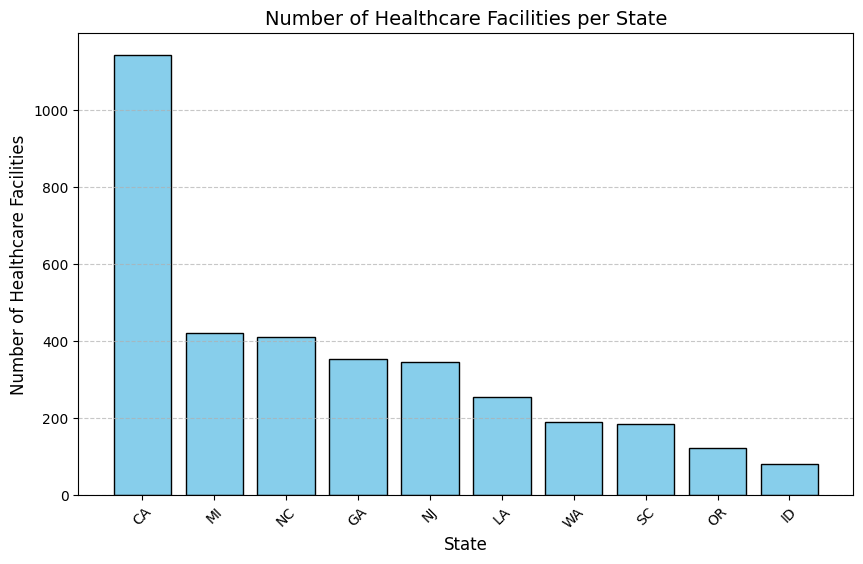

In [331]:
unique_facilities = pbj.drop_duplicates(subset=['PROVNUM'])
facilities = unique_facilities['STATE'].value_counts()

plt.figure(figsize=(10,6))
plt.bar(facilities.index, facilities.values, color='skyblue', edgecolor='black')
plt.xlabel("State", fontsize=12)
plt.ylabel("Number of Healthcare Facilities", fontsize=12)
plt.title("Number of Healthcare Facilities per State", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

While the primary focus of this EDA is on state-specific attributes, understanding county-level distribution provides an additional layer of insight into facility availability.

Using the .groupby() function, I aggregated the number of unique healthcare facilities (PROVNUM) per county, across the 10 states of interest. This breakdown allows for:

- Targeted sales strategies at the county level, helping sales teams focus on high-opportunity regions.
- Potential future analysis into regional staffing shortages at a more localized level.

Currently, this analysis only showcases how to access the information rather than diving into deeper trends. However, a more refined county-specific approach can be developed for targeting specific high-demand areas in future sales reports.

In [334]:
facility_counts = pbj.groupby(['STATE', 'COUNTY_NAME'])['PROVNUM'].nunique().reset_index()

# Rename column for clarity
facility_counts.rename(columns={'PROVNUM': 'Facility_Count'}, inplace=True)

# Display result
print(facility_counts)

    STATE  COUNTY_NAME  Facility_Count
0      CA      Alameda              68
1      CA       Amador               1
2      CA        Butte               9
3      CA    Calaveras               1
4      CA       Colusa               2
..    ...          ...             ...
586    WA     Thurston               7
587    WA  Walla Walla               4
588    WA      Whatcom               8
589    WA      Whitman               2
590    WA       Yakima              10

[591 rows x 3 columns]


---
## Distribution of Employed vs Contracted Nurses per State
Since Clipboard Health specializes in staffing contracted nurses, it is crucial to identify which states have the highest demand for contract-based nursing staff. To analyze this, I am using pie charts to visualize the percentage of employed vs. contracted nurses across different states.

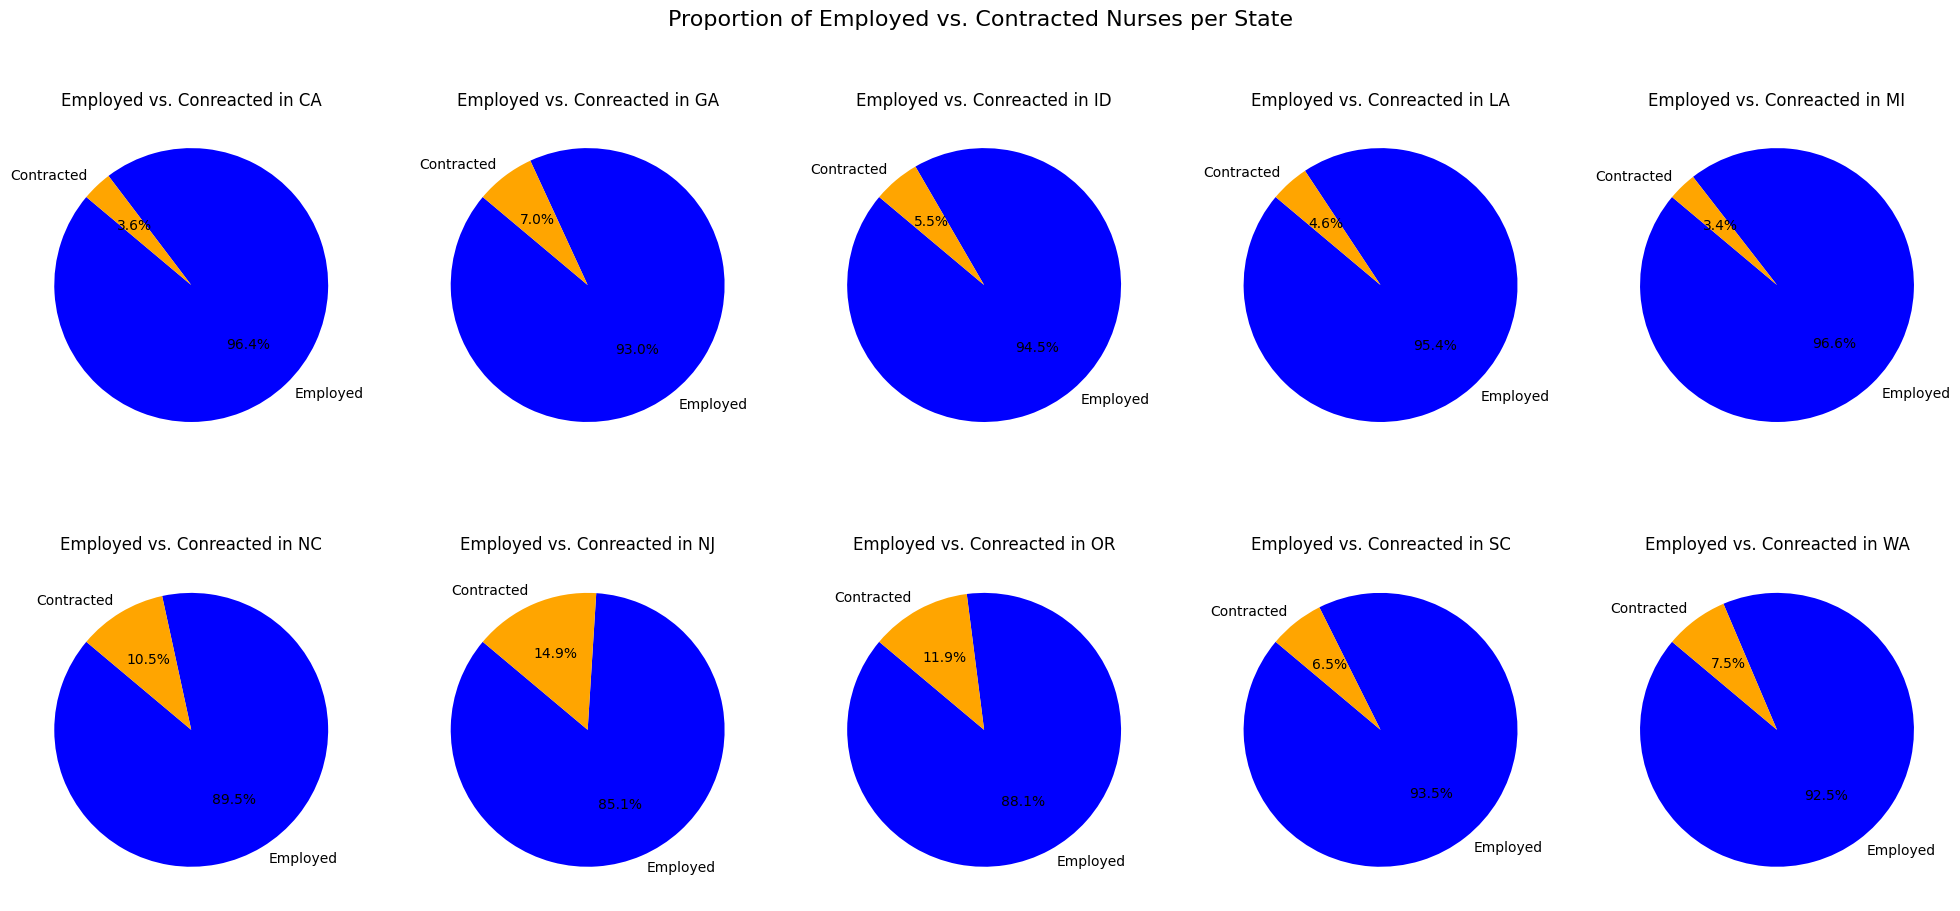

In [337]:
# Define relevant columns for all nurse types (employed vs. contracted)
nurse_categories = {
    'Hrs_RNDON_emp': 'RN Director (Employed)', 'Hrs_RNDON_ctr': 'RN Director (Contracted)',
    'Hrs_RN_emp': 'RN (Employed)', 'Hrs_RN_ctr': 'RN (Contracted)',
    'Hrs_LPN_emp': 'LPN (Employed)', 'Hrs_LPN_ctr': 'LPN (Contracted)',
    'Hrs_CNA_emp': 'CNA (Employed)', 'Hrs_CNA_ctr': 'CNA (Contracted)',
    'Hrs_NAtrn_emp': 'Nurse Aide Trainee (Employed)', 'Hrs_NAtrn_ctr': 'Nurse Aide Trainee (Contracted)',
    'Hrs_MedAide_emp': 'Medication Aide (Employed)', 'Hrs_MedAide_ctr': 'Medication Aide (Contracted)'
}


state_nurse_hours = pbj[pbj['STATE'].isin(shortage_states)]
state_nurse_totals = state_nurse_hours.groupby("STATE")[list(nurse_categories.keys())].sum()

fig, axes = plt.subplots(2, 5, figsize=(20, 10))

axes = axes.flatten()

for ax, (state, data) in zip(axes, state_nurse_totals.iterrows()):
    employed_hours = data[[col for col in nurse_categories if '_emp' in col]].sum()
    contracted_hours = data[[col for col in nurse_categories if '_ctr' in col]].sum()

    ax.pie(
        [employed_hours, contracted_hours], 
        labels=["Employed", "Contracted"], 
        autopct='%1.1f%%',
        colors=["blue", "orange"], 
        startangle=140
    )
    
    ax.set_title(f"Employed vs. Conreacted in {state}")

fig.suptitle("Proportion of Employed vs. Contracted Nurses per State", fontsize=16)

plt.tight_layout()
plt.show()

---
## Key Insights:
- California, despite having the largest number of healthcare facilities, has a relatively low percentage of contracted nurses (3.6%). However, due to the sheer volume of facilities, the absolute number of contracted nurses remains significant—meaning this state should not be overlooked as a potential market.

- States with the highest percentage of contracted nurses indicate a stronger reliance on temporary staffing.


These states may present stronger opportunities for Clipboard Health’s sales team to focus on, as facilities in these regions appear to hire more contract-based nurses compared to full-time employees.

---
# Recommendation 1: Targeting States Based on High Contract Work Potential

The data shows that California remains the largest market in terms of total healthcare facilities. However, states like Oregon, North Carolina, New Jersey, and Washington stand out for having the highest percentage of working hours fulfilled by contracted nurses—highlighting key opportunities for Clipboard to expand its footprint.

As outlined at the beginning of this project, all 10 analyzed states are projected to experience significant staffing shortages by 2035. This future outlook further reinforces the urgency to proactively build partnerships in high-potential markets.

I recommend that Clipboard’s sales efforts focus strategically on these 10 states due to their current reliance on contract staff and future staffing risks, with priority attention given to:
- California
- Oregon
- North Carolina
- New Jersey
- Washington State

To optimize outreach and effectiveness:

Create state-specific sales task groups to build relationships and tailor messaging based on local trends.

---
## Enhancing Job Placement through Data

## Overview of Job Titles: 

- Hrs_RNDON_emp, Hrs_RNDON_ctr → RN Directors of Nursing
- Hrs_RN_emp, Hrs_RN_ctr → Registered Nurses (RNs)
- Hrs_LPN_emp, Hrs_LPN_ctr → Licensed Practical Nurses (LPNs)
- Hrs_CNA_emp, Hrs_CNA_ctr → Certified Nursing Assistants (CNAs)
- Hrs_NAtrn_emp, Hrs_NAtrn_ctr → Nurse Aides in Training
- Hrs_MedAide_emp, Hrs_MedAide_ctr → Medication Aides

In a competitive healthcare staffing market, sales teams must make informed decisions to match candidates with the right opportunities. Successfully placing nurses in facilities requires more than just availability—qualifications, certifications, and job-specific requirements also play a crucial role.

Since employers seek different types of nurses based on facility needs and state regulations, my next step is to analyze the most employed nurse types by state. This will help:

- Guide job-seeking nurses on which qualifications and certifications will enhance their hiring potential.
- Identify high-demand nursing roles in different states to improve job-matching efficiency.
- Enable the sales team to position Clipboard Health’s services more effectively by targeting those specific nurse types.

By exploring and visualizing the distribution of nurse types across states, Clipboard Health can optimize both candidate preparation and job placement strategies, ensuring that nurses are aligned with high-opportunity markets.

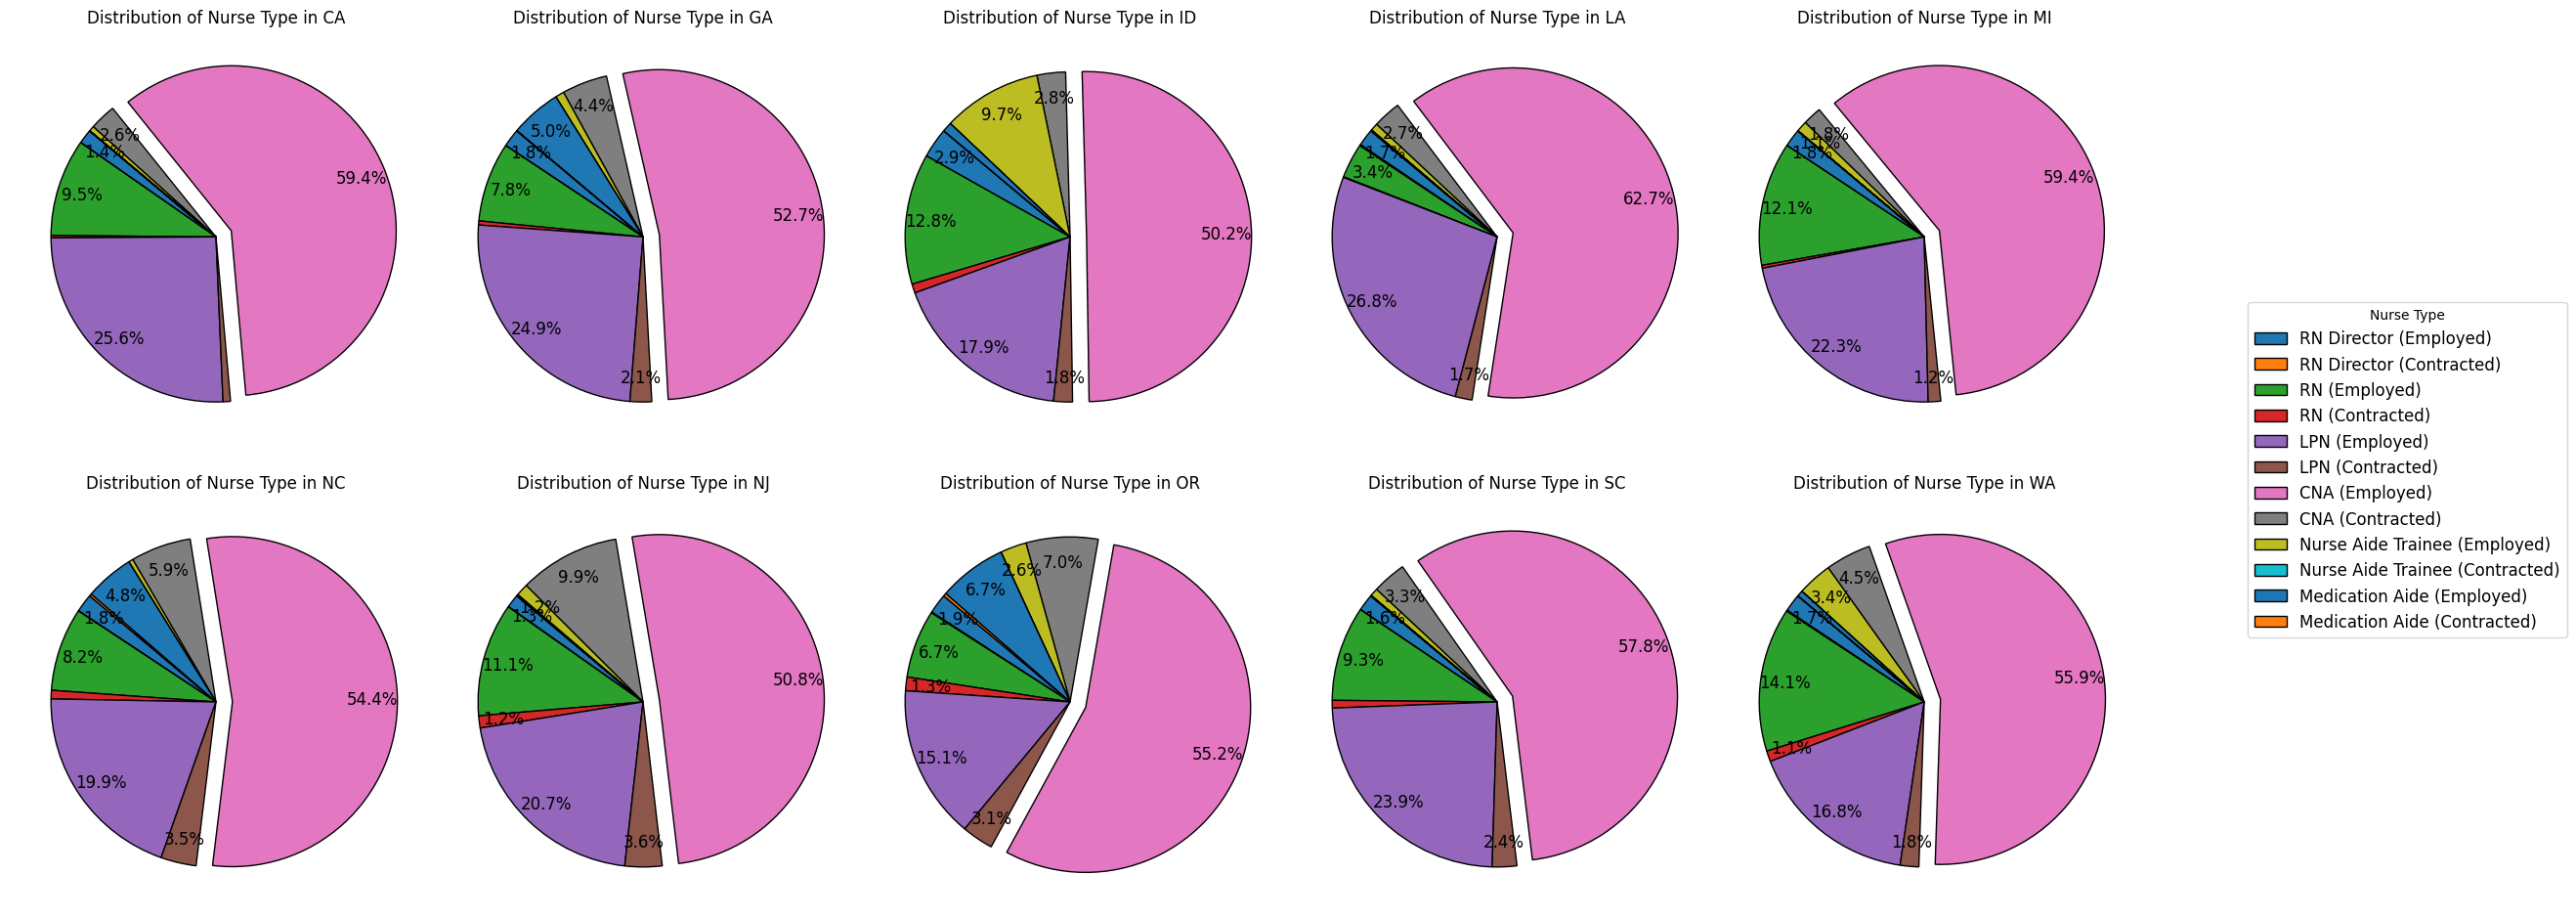

In [343]:
state_nurse_totals = state_nurse_totals.loc[state_nurse_totals.index.isin(shortage_states)]
state_nurse_totals.rename(columns=nurse_categories, inplace=True)

fig, axes = plt.subplots(2, 5, figsize=(22, 10)) 
legend_labels = None

for ax, (state, data) in zip(axes.flatten(), state_nurse_totals.iterrows()):
    explode = [0.1 if val == data.max() else 0 for val in data]

    # Filter out very small segments for better readability (only show >1%)
    def autopct_format(pct):
        return f'{pct:.1f}%' if pct > 1 else ''  # Hide labels below 1%

    wedges, texts, autotexts = ax.pie(
        data, autopct=autopct_format, startangle=140, pctdistance=0.85,
        explode=explode, wedgeprops={'edgecolor': 'black'},
        textprops={'fontsize': 12}
    )
    
    ax.set_title(f"Distribution of Nurse Type in {state}", fontsize=12)
    
    if legend_labels is None:
        legend_labels = wedges

fig.legend(legend_labels, state_nurse_totals.columns, title="Nurse Type", loc="center right", bbox_to_anchor=(1.2, 0.5), fontsize=12)

plt.tight_layout()
plt.show()

---
## Insights into the Job Market
The pie charts reveal a consistent employment pattern across all 10 states, indicating that certain nursing roles are in higher demand than others. The three dominant job types in the healthcare sector are:

### Certified Nursing Assistants (CNAs) 
- Over 50% of employed healthcare professionals fall into this category, making it the most in-demand role.
- CNAs are essential for day-to-day patient care, which could explain their high employment rate in facilities.

### Licensed Practical Nurses (LPNs) 
- LPN employment rates range from 15% to 26.8% depending on the state.
- These roles provide a bridge between CNAs and RNs, playing a crucial role in patient supervision and medication administration.

### Registered Nurses (RNs) 
- The RN employment share varies between 8% and 14%, with one exception: Louisiana (LA), where only 3.4% of employed nurses are RNs.
- The lower RN employment rate in LA is likely due to the higher share of CNAs and LPNs, possibly influenced by state-level policies or cost-saving employment structures.

---

## The Workhorses of Healthcare:

The overwhelming dominance of Certified Nursing Assistants (CNAs) across each state clearly signals the critical demand for this role in healthcare facilities. For Clipboard Health’s sales team, this presents a key entry point when targeting facilities that rely heavily on CNAs.

To further refine our strategy, we must analyze the distribution of hours worked by employed vs. contracted nurses across various job categories. By doing so, we can identify which roles rely most on contract staffing, providing valuable insights into where contracted nurses are most likely to be hired.

To enhance clarity and visibility, I am splitting the analysis into two separate bar charts due to the large variations in hours worked across different job types:

### First Bar Chart: Core Nursing Roles

- Certified Nursing Assistants (CNA)
- Licensed Practical Nurses (LPN)
- Registered Nurses (RN)

These roles represent the foundation of patient care and constitute the largest share of the workforce.

### Second Bar Chart: Specialized Roles

- RN Director of Nursing (RNDON)
- RN Administration (RNadmin)
- LPN Administration (LPadmin)
- Nurse Aide Trainee (NATrn)
- Medication Aide (MedAid)

These positions often involve leadership, supervision, or specialized training, making them critical but less numerous in terms of overall workforce distribution.

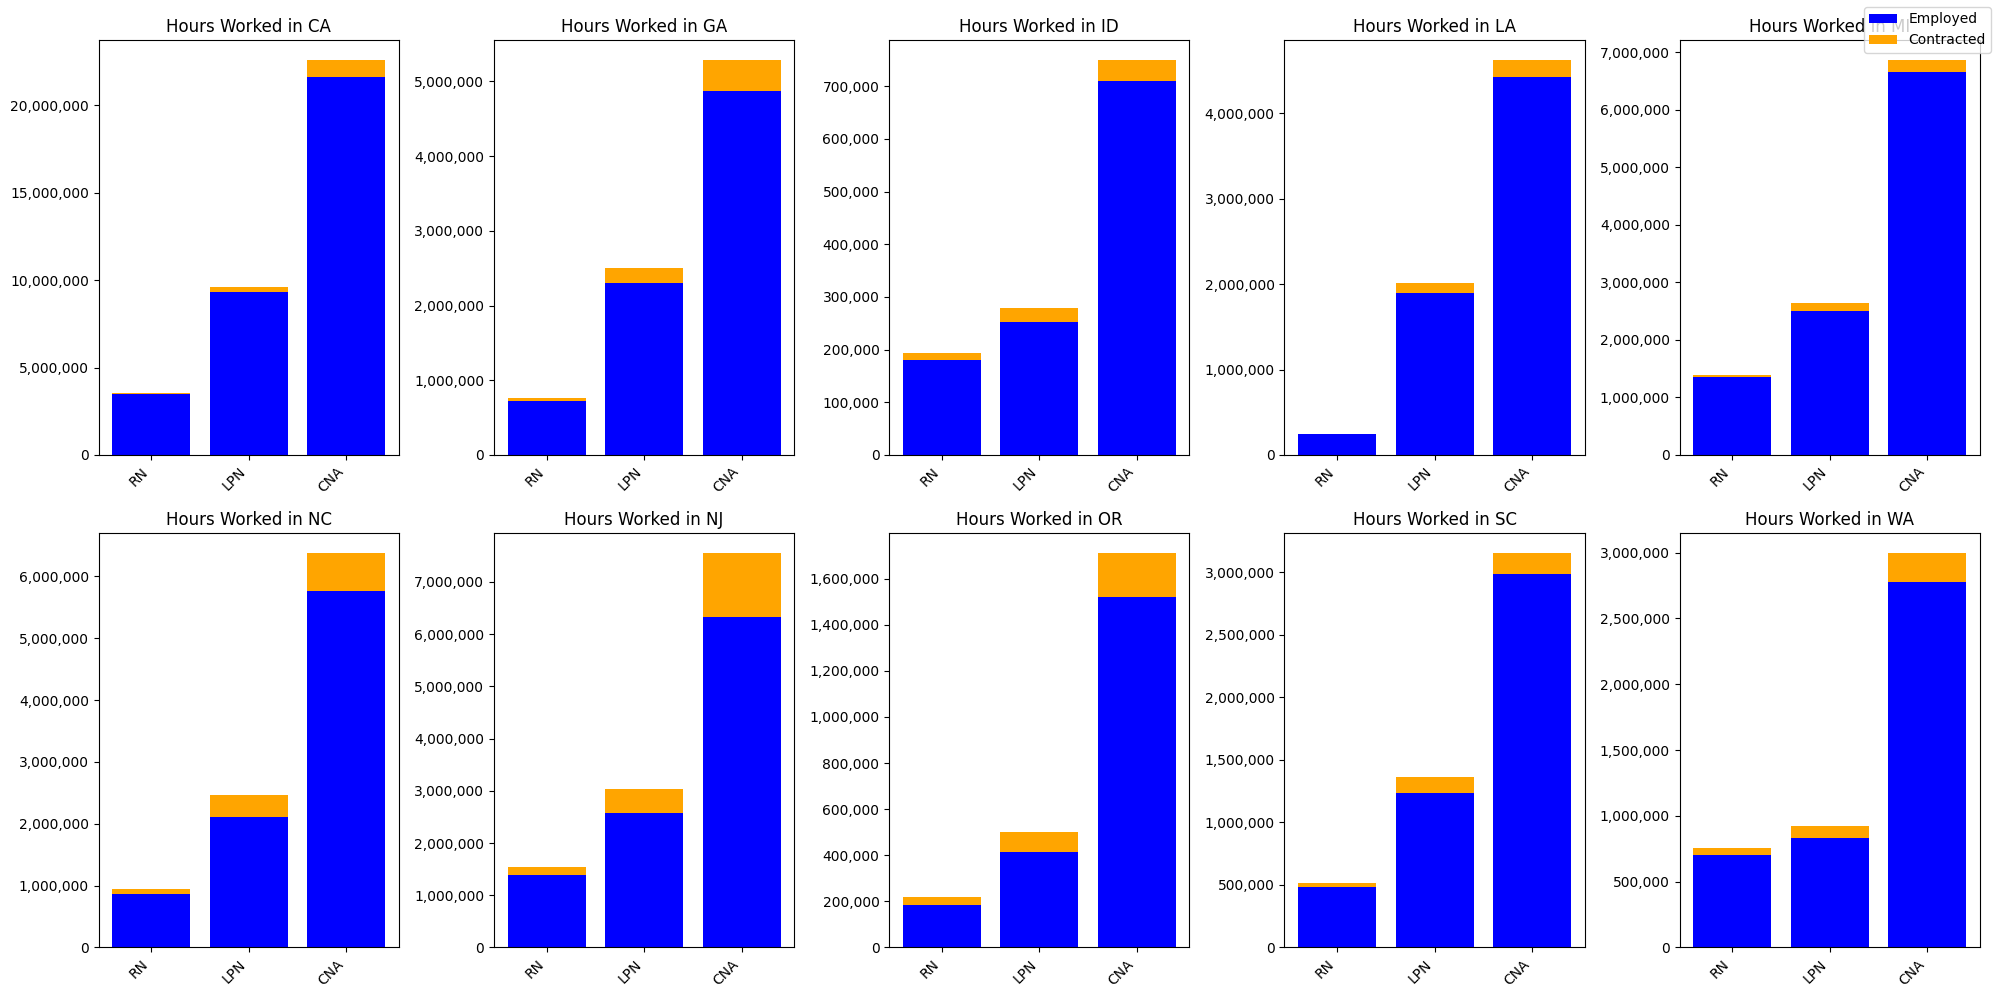

In [347]:
selected_nurses = ['Hrs_RN_emp', 'Hrs_RN_ctr', 'Hrs_LPN_emp', 'Hrs_LPN_ctr', 'Hrs_CNA_emp', 'Hrs_CNA_ctr']

state_nurse_hours = pbj[pbj['STATE'].isin(shortage_states)]
state_nurse_totals = state_nurse_hours.groupby("STATE")[selected_nurses].sum()

fig, axes = plt.subplots(2, 5, figsize=(20, 10))  
axes = axes.flatten()

for ax, (state, data) in zip(axes, state_nurse_totals.iterrows()):
    employed_hours = data[[col for col in selected_nurses if '_emp' in col]]
    contracted_hours = data[[col for col in selected_nurses if '_ctr' in col]]
    
    x = np.arange(len(employed_hours))
    
    ax.bar(x, employed_hours, label="Employed", color="blue")
    ax.bar(x, contracted_hours, bottom=employed_hours, label="Contracted", color="orange")
    
    ax.set_title(f"Hours Worked in {state}")
    ax.set_xticks(x)
    
    job_labels = ["RN", "LPN", "CNA"]
    ax.set_xticklabels(job_labels, rotation=45, ha="right")
    ax.set_yscale("linear")
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))

fig.legend(["Employed", "Contracted"], loc="upper right")
plt.tight_layout()
plt.show()

---
## Insights on RN, LPN and CNA
The stacked bar charts confirm earlier predictions—all 10 states experiencing staffing shortages show great potential for contracted nurses, with clear patterns emerging in employment vs. contracted nurse utilization.

### Certified Nursing Assistants (CNAs) are the backbone of healthcare staffing

- CNAs work the highest total hours across all states.
- Contracted CNAs have a strong market opportunity given the immense workload required.
- Facilities are highly dependent on CNA labor, making it easier to introduce contract-based staffing solutions.

### Licensed Practical Nurses (LPNs) show increasing contract market potential

- LPN hours worked are significantly higher than RNs but lower than CNAs.
- Contracted LPN hours are growing, indicating a rising demand for flexible workforce solutions in this category.
- LPNs play a critical supporting role between CNAs and RNs, making them a key area to target for contract expansion.

### Registered Nurses (RNs) have the lowest working hours but strong placement potential

- Despite having fewer total hours worked compared to CNAs and LPNs, contracted RNs still represent a market opportunity.
- Facilities may be hesitant to hire RNs as contractors due to long-standing employment models, but educating them on the benefits of flexibility can unlock new placement opportunities.
- RNs remain an essential part of facility staffing, and a targeted strategy can help position contract nurses in specialized roles where full-time hiring may be less feasible.

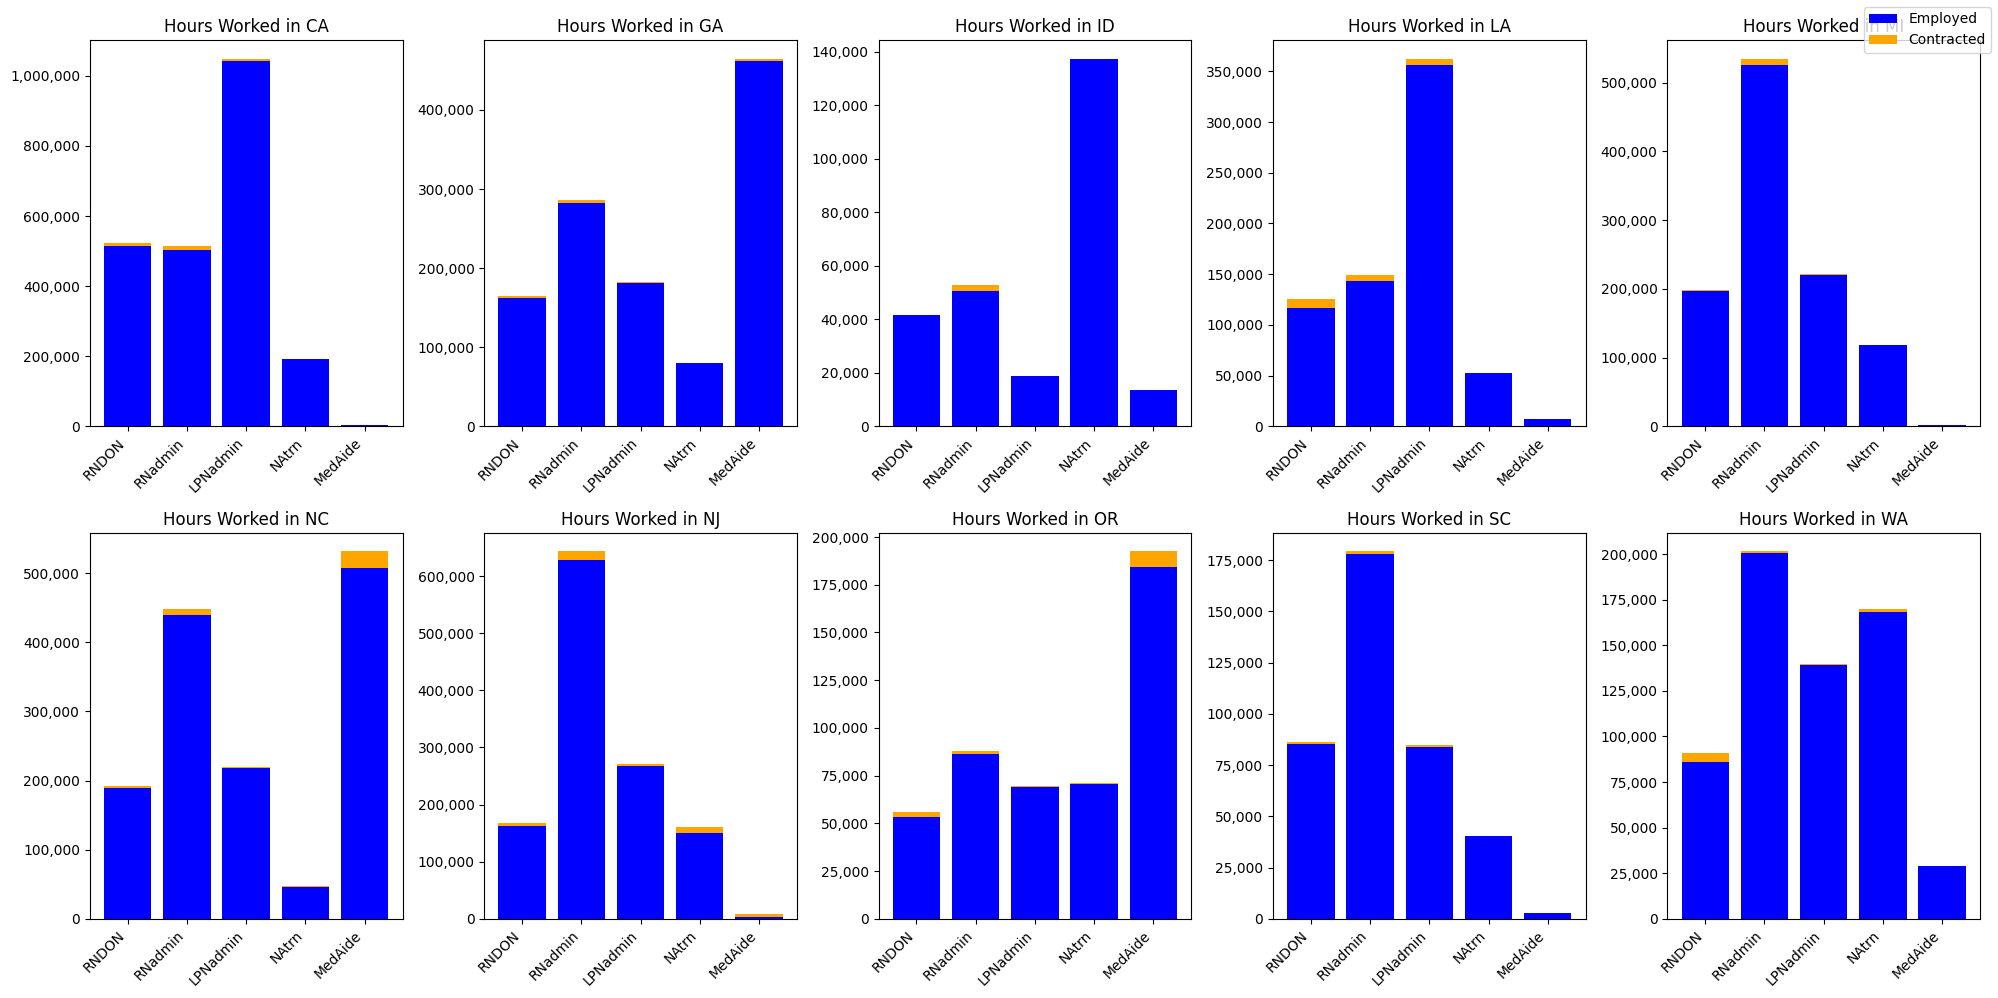

In [350]:
selected_nurses = [
    'Hrs_RNDON_emp', 'Hrs_RNDON_ctr', 
    'Hrs_RNadmin_emp', 'Hrs_RNadmin_ctr', 
    'Hrs_LPNadmin_emp', 'Hrs_LPNadmin_ctr', 
    'Hrs_NAtrn_emp', 'Hrs_NAtrn_ctr', 
    'Hrs_MedAide_emp', 'Hrs_MedAide_ctr'
]

state_nurse_hours = pbj[pbj['STATE'].isin(shortage_states)]
state_nurse_totals = state_nurse_hours.groupby("STATE")[selected_nurses].sum()

fig, axes = plt.subplots(2, 5, figsize=(20, 10))  
axes = axes.flatten()

for ax, (state, data) in zip(axes, state_nurse_totals.iterrows()):
    employed_hours = data[[col for col in selected_nurses if '_emp' in col]]
    contracted_hours = data[[col for col in selected_nurses if '_ctr' in col]]
    
    x = np.arange(len(employed_hours))
    ax.bar(x, employed_hours, label="Employed", color="blue")
    ax.bar(x, contracted_hours, bottom=employed_hours, label="Contracted", color="orange")
    ax.set_title(f"Hours Worked in {state}")
    ax.set_xticks(x)
    
    job_labels = [
        col.replace("Hrs_", "").replace("_emp", "").replace("_ctr", "")
        for col in employed_hours.index
    ]
    
    ax.set_xticklabels(job_labels, rotation=45, ha="right")
    ax.set_yscale("linear")
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))

fig.legend(["Employed", "Contracted"], loc="upper right")
plt.tight_layout()
plt.show()

---
## Insights RNDON, Rnadmin, NAtrn, MedAide

### RN Directors of Nursing (RNDON) & RN Administrators (RN Admin)

- These roles are primarily held by full-time employees, with very limited contracted positions.
- Facilities prefer permanent leadership roles for consistency and operational stability.
- Market potential for contracted nurses is minimal unless facilities shift toward temporary leadership solutions.

### LPN Administrators (LP Admin)

- Higher total hours worked compared to RNDON & RN Admin.
- Slight potential for contracted positions, but mostly employed staff dominate this category.
- Contracted LPN Admins could fill in for management gaps or serve as temporary leadership staff when needed.

### Nurse Aide Trainees (NATrn) & Medication Aides (MedAide)

- NATrn positions have moderate hours, with some states showing contract nurse potential (e.g., California, Georgia, North Carolina, and Louisiana).
- Medication Aides (MedAide) have relatively low hours worked overall, limiting their contract potential.
- The market for contracted MedAides is currently underdeveloped, but specific states show slight signs of demand.

---
## Analyzing Workload Peaks: Identifying High-Demand Days & Nurse Types

One of the key strengths of Clipboard Health’s business model is its ability to match nurses with facilities based on flexible scheduling. Understanding when demand spikes can provide a competitive advantage in job placement.

For sales professionals, having insight into the busiest days and highest-demand nurse types allows for:
- Optimized job matching, increasing the chances of successfully placing nurses.
- Strategic staffing recommendations to facilities, ensuring smooth operations during peak times.
- Enhanced sales conversations, where data-driven insights help convince facilities to adopt contract staffing solutions.

### Visualization Approach: Heatmaps for Each State
To identify patterns in demand, I am creating heatmaps for each state that illustrate:
- Which days of the week have the highest total working hours.
- Which nurse types are most in demand on those high-volume days.
- Potential trends that indicate staffing shortages on specific days.

By analyzing state-specific demand patterns, Clipboard Health’s sales team can focus on placing nurses where and when they’re needed most, improving both facility satisfaction and candidate placement success.

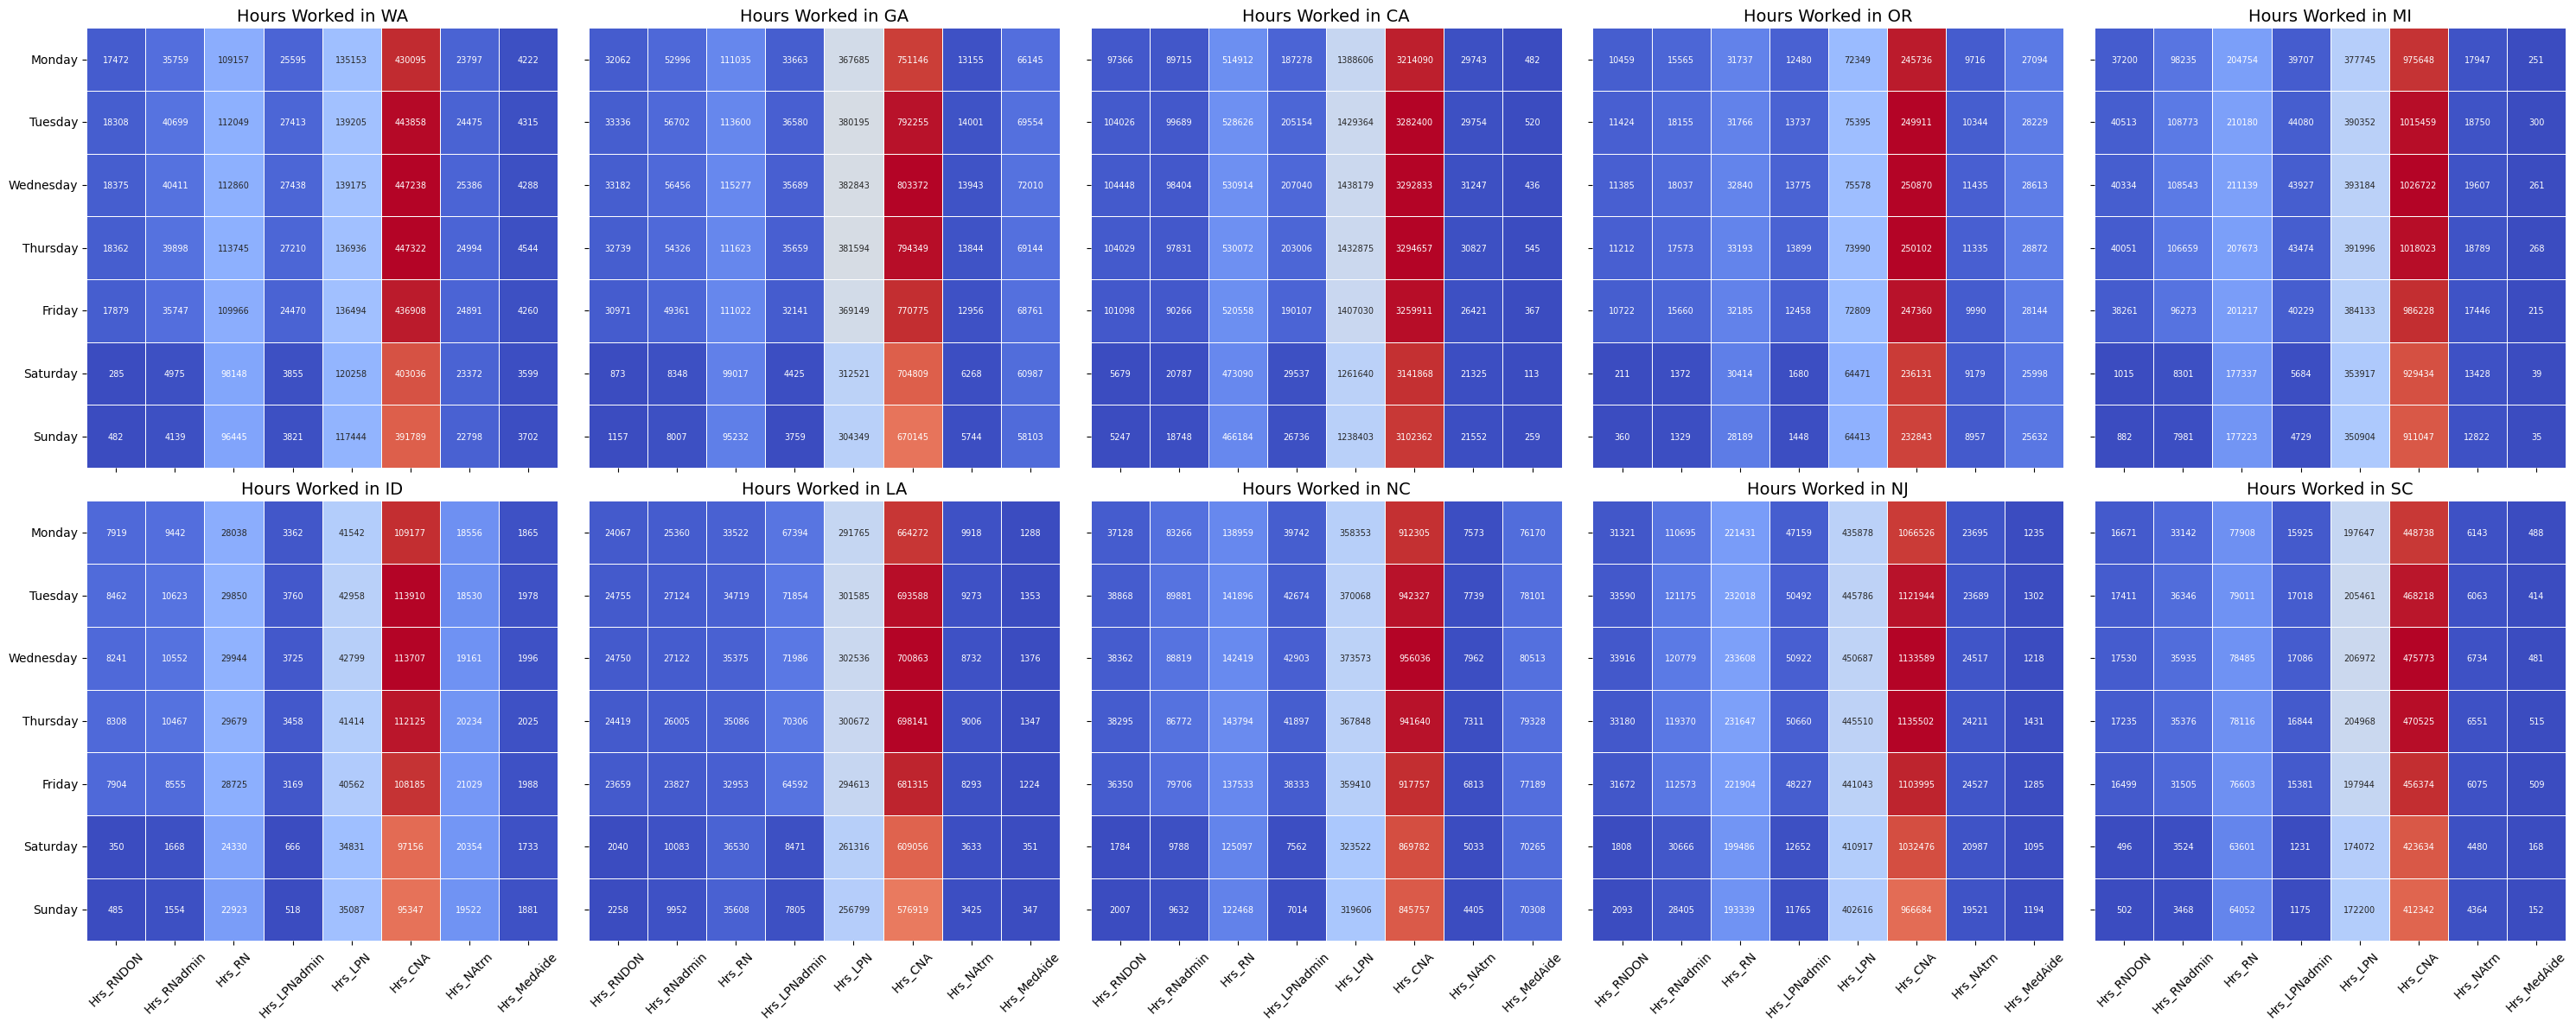

In [354]:
nurse_hour_columns = [
    'Hrs_RNDON', 'Hrs_RNadmin', 'Hrs_RN', 'Hrs_LPNadmin',
    'Hrs_LPN', 'Hrs_CNA', 'Hrs_NAtrn', 'Hrs_MedAide'
]

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig, axes = plt.subplots(2, 5, figsize=(30, 12), sharex=True, sharey=True)
axes = axes.flatten()

for ax, state in zip(axes, shortage_states):
    pbj_state = pbj[pbj['STATE'] == state]

    state_day_hours = pbj_state.groupby('Day_Name')[nurse_hour_columns].sum()
    state_day_hours = state_day_hours.reindex(day_order)

    sns.heatmap(state_day_hours, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5,
                ax=ax, cbar=False, annot_kws={"size": 7})

    ax.set_title(f"Hours Worked in {state}", fontsize=14)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()

---
## Key Findings: High-Demand Days Across States
- Weekdays (Monday – Friday) see the highest total hours worked, while Sundays consistently show the lowest demand across all states.
- Fridays and Saturdays tend to have a slight dencrease in hours compared to other weekdays, possibly due to weekend staffing gaps.
- California and New Jersey have the highest overall work hours, reinforcing their large market potential for contract nurses.

## Most In-Demand Nurse Types
- Certified Nursing Assistants (CNAs) dominate total work hours across all states, reinforcing the strong contract staffing potential for this role.
- Licensed Practical Nurses (LPNs) have the second-highest workload, particularly in New Jersey, Georgia, and Michigan.
- Registered Nurses (RNs) work fewer hours compared to CNAs and LPNs, but still represent a growth area for contract staffing in certain states.
---

## Targeting Specific States for Work Hours by Nurse Type (Spread)
Now that I have a general overview of which nurse type works the most hours and how demand varies between weekdays and weekends, I now can take a closer look at each state individually. By creating a heatmap for each nursing type, I am able to better understand demand trends across different days. This approach can support the sales team in making more informed decisions by identifying high-demand periods. Since I am based in Los Angeles, I used California’s data to demonstrate this workflow concept and comparing it to Oregon to see if states have similar trends.

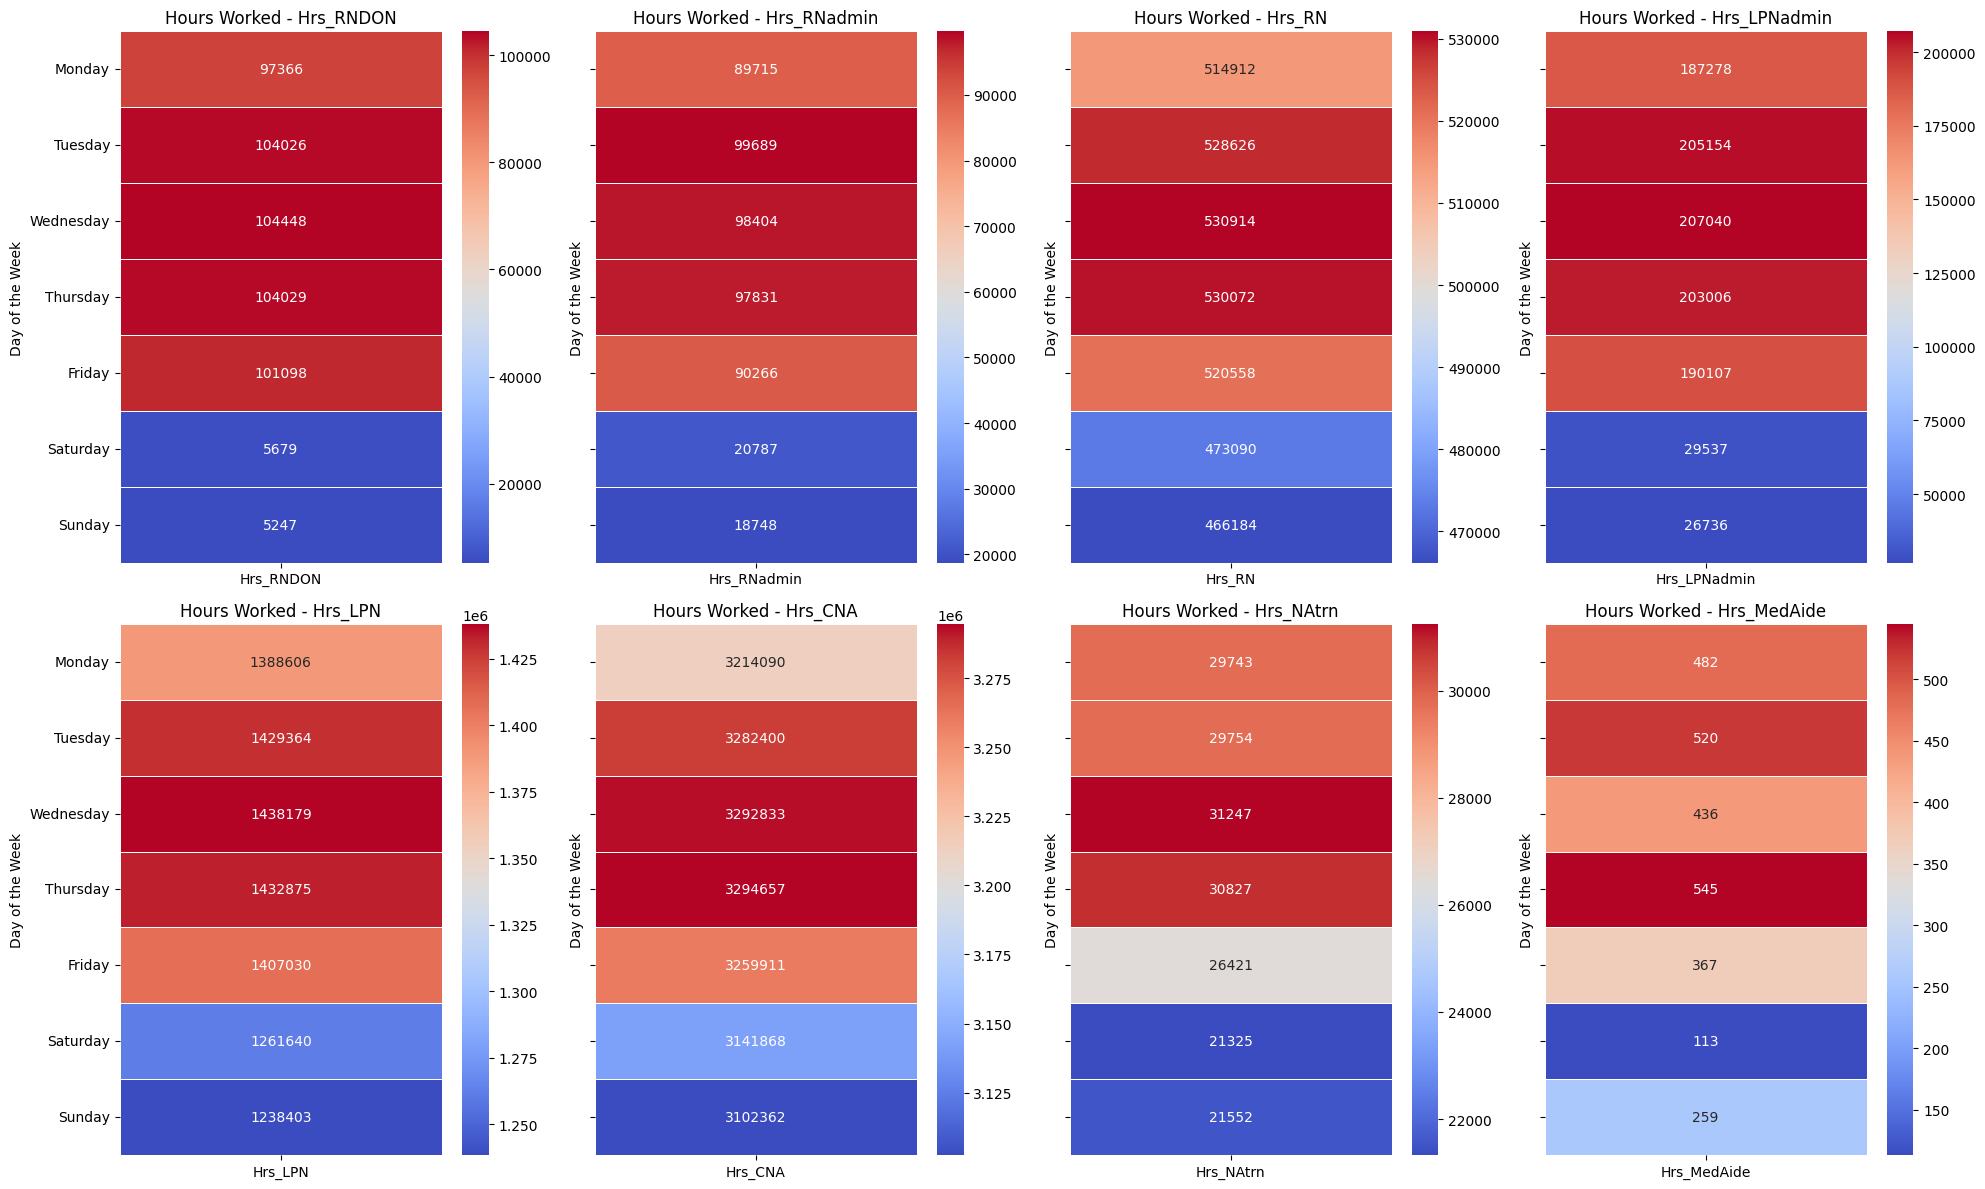

In [358]:
pbj_ca = pbj[pbj['STATE'] == 'CA']
ca_day_hours = pbj_ca.groupby('Day_Name')[nurse_hour_columns].sum()

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ca_day_hours = ca_day_hours.reindex(day_order)

fig, axes = plt.subplots(2, 4, figsize=(20, 12), sharey=True)

for ax, nurse_type in zip(axes.flatten(), nurse_hour_columns):
    nurse_data = ca_day_hours[[nurse_type]]  
    sns.heatmap(nurse_data, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5, ax=ax)
    
    ax.set_title(f"Hours Worked - {nurse_type}", fontsize=12)
    ax.set_xlabel("")
    ax.set_ylabel("Day of the Week")

plt.tight_layout()
plt.show()

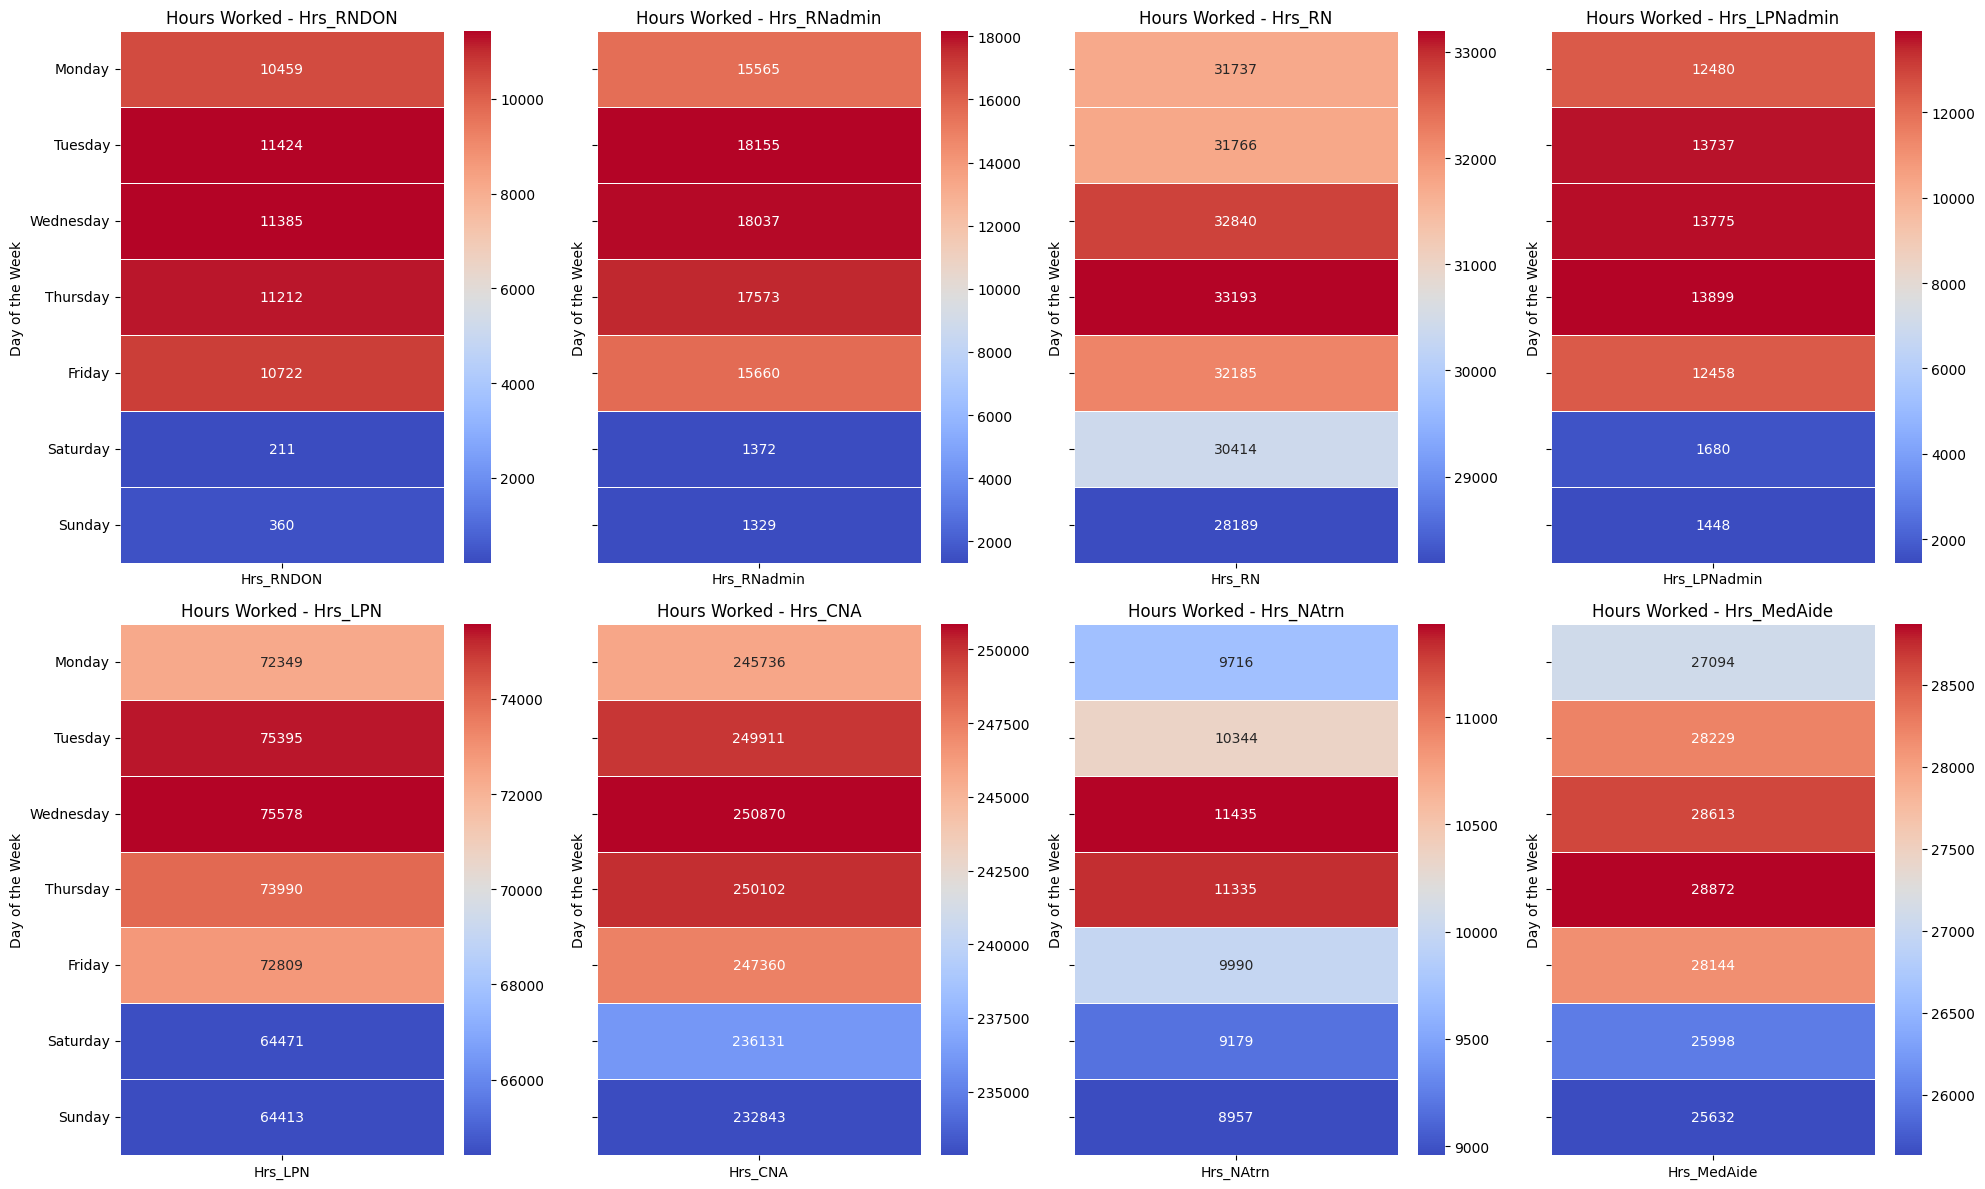

In [360]:
pbj_or = pbj[pbj['STATE'] == 'OR']
or_day_hours = pbj_or.groupby('Day_Name')[nurse_hour_columns].sum()

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
or_day_hours = or_day_hours.reindex(day_order)

fig, axes = plt.subplots(2, 4, figsize=(20, 12), sharey=True)

for ax, nurse_type in zip(axes.flatten(), nurse_hour_columns):
    nurse_data = or_day_hours[[nurse_type]]  
    sns.heatmap(nurse_data, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5, ax=ax)
    
    ax.set_title(f"Hours Worked - {nurse_type}", fontsize=12)
    ax.set_xlabel("")
    ax.set_ylabel("Day of the Week")

plt.tight_layout()
plt.show()

## Deep Dive: California and Oregon

A closer examination of California and Oregon supports and adds nuance to the broader trends:

- In California, CNA, LPN, and RN roles experience very high demand Monday through Friday, with Wednesday and Thursday often being the peak days.

- Weekend demand declines across all roles, but CNA, LPN, and RN still show relatively strong weekend workloads, indicating continued patient care needs.

- Conversely, RN and LPN administrative roles see a dramatic drop-off on Saturday and Sunday, further confirming their weekday-centric schedules.

In Oregon, we see a similar structure:

- CNA, LPN, and RN roles maintain high demand during the week, especially from Tuesday through Thursday.

- Weekend hours decrease but remain consistent for clinical roles, with CNA work in particular staying relatively strong even on Saturdays and Sundays.

- Once again, administrative roles nearly disappear over the weekend, confirming that facilities focus staffing efforts on direct patient care roles during these days.

---
# Recommendation 2: Focus on CNA, LPN and RN jobs Based on Day of the Week

Clipboard’s strength lies in offering flexibility—both for healthcare facilities filling shifts and for nurses managing their own schedules. To maximize this value, it's crucial to align staffing strategies with actual demand patterns throughout the week.

Heatmaps from both California and Oregon reveal that Certified Nursing Assistants (CNA), Licensed Practical Nurses (LPN), and Registered Nurses (RN) consistently log the most hours. The highest demand occurs Monday through Friday, with Wednesday and Thursday standing out as peak days across both states. These are the days when facilities need the most staffing support, making them key targets for sales and recruiting teams. This seems to be a trend accross al 10 target states.

On the weekends (Saturday and Sunday), there is a noticeable drop in overall hours, especially for administrative roles such as RN and LPN administrators. However, core clinical roles—CNA, LPN, and RN—continue to show strong weekend activity, particularly in California, where weekend shifts remain substantial despite the decline.

These patterns suggest that while weekday staffing should be a primary focus, weekend coverage remains critical for clinical roles. The sales team can use this insight to prioritize outreach based on both role type and day of the week, helping facilities stay fully staffed and responsive to patient care demands.

- Prioritize outreach to facilities on Tuesdays through Thursdays, aligning with peak workload periods.

- Focus heavily on CNA, LPN, and RN roles, which consistently show the highest demand.

- Tailor weekend staffing strategies to clinical roles only, as administrative needs sharply decline during that time.

---
## Enhancing the Data Analysis with the Providers Table
To uncover additional indicators of understaffing and identify potential clients, I integrated the Provider Information Table into the analysis. I focused on several key columns: 

CMS Certification Number (CCN), Number of Certified Beds, Average Number of Residents per Day, Overall Rating, Total Nursing Staff Turnover, Ownership Type, and Legal Business Name.

These variables offer valuable insight into each facility’s capacity, staffing patterns, quality ratings, and operational structure.

To combine this data with the existing PBJ dataframe, I used the CMS Certification Number (CCN) column, which matches the PROVNUM column in the PBJ dataset. This allowed me to accurately align facility-level information across both data sources using a shared unique identifier. Before merging, I reviewed the provider data for missing values within the selected columns to ensure data integrity and avoid introducing inconsistencies during analysis.

In [365]:
provider_df = pd.read_csv('/Users/oliverbohler/Desktop/Clipboard Health/NH_ProviderInfo_Feb2025.csv')

columns_to_keep = [
    "CMS Certification Number (CCN)", 
    "Number of Certified Beds", 
    "Average Number of Residents per Day", 
    "Overall Rating", 
    "Total nursing staff turnover",
    "Ownership Type",
    "Legal Business Name"
]

provider_df = provider_df[columns_to_keep]

# Rename CCN to PROVNUM for merging
provider_df.rename(columns={"CMS Certification Number (CCN)": "PROVNUM"}, inplace=True)

provider_df.head()

,PROVNUM,Number of Certified Beds,Average Number of Residents per Day,Overall Rating,Total nursing staff turnover,Ownership Type,Legal Business Name
0,015009,57,53.5,2.0,36.5,For profit - Corporation,"BURNS NURSING HOME, INC."
1,015010,85,76.4,3.0,NaN,For profit - Corporation,COOSA VALLEY HEALTHCARE CENTER LLC
2,015012,50,45.7,3.0,NaN,Government - County,HH HEALTH SYSTEM - JACKSON LLC
3,015014,92,69.3,2.0,NaN,For profit - Individual,BALL HEALTHCARE EASTVIEW INC
4,015015,103,87.6,3.0,30.3,For profit - Individual,"C & G HEALTHCARE SERVICES, INC."


---
## Missing Values and How to Handle Them
Using the .head() function provided a quick snapshot of the dataset, immediately revealing some NaN values in the Total Nursing Staff Turnover column. Upon further inspection, I found that approximately 9% of the entries in this column were missing.

Rather than dropping these rows—which could result in the loss of valuable data—I opted to impute the missing values using the mean. Given the relatively low percentage of missing data, this approach helps preserve the integrity of the dataset while maintaining consistency across records.

This decision is further supported by the assumption that facilities with similar characteristics—such as high bed occupancy—are likely to have comparable turnover rates. As such, using the mean allows the analysis to remain robust without introducing significant bias or distortion.

In [368]:
duplicates = provider_df[provider_df.duplicated()]
if duplicates.empty:
    print("No duplicates found.")
else:
    print("Duplicates found.")
    duplicate_count = duplicates.shape[0]
    print(f"Number of duplicate rows: {duplicate_count}")
    rideshare = provider_df.drop_duplicates()
    print(f"All {duplicate_count} duplicates have been dropped")

No duplicates found.


In [370]:
missing_values = pd.concat([provider_df.isnull().sum(), 100 * provider_df.isnull().mean()], axis = 1)
missing_values.columns = ['count','%']
missing_values.sort_values(by = 'count', ascending = False)

,count,%
Total nursing staff turnover,1347,9.112434
Overall Rating,141,0.953863
Average Number of Residents per Day,52,0.351779
PROVNUM,0,0.000000
Number of Certified Beds,0,0.000000
Ownership Type,0,0.000000
Legal Business Name,0,0.000000


In [372]:
provider_df.loc[:, 'Total nursing staff turnover'] = provider_df['Total nursing staff turnover'].fillna(provider_df['Total nursing staff turnover'].mean())
provider_df.loc[:, 'Overall Rating'] = provider_df['Overall Rating'].fillna(provider_df['Overall Rating'].mean())
provider_df.loc[:, 'Average Number of Residents per Day'] = provider_df['Average Number of Residents per Day'].fillna(provider_df['Average Number of Residents per Day'].mean())

missing_values = pd.concat([provider_df.isnull().sum(), 100 * provider_df.isnull().mean()], axis = 1)
missing_values.columns = ['count','%']
missing_values.sort_values(by = 'count', ascending = False)

,count,%
PROVNUM,0,0.0
Number of Certified Beds,0,0.0
Average Number of Residents per Day,0,0.0
Overall Rating,0,0.0
Total nursing staff turnover,0,0.0
Ownership Type,0,0.0
Legal Business Name,0,0.0


---
## Merging
With missing values addressed and the dataset cleaned, I proceeded to merge the PBJ dataframe with the Provider Information Table using the shared unique identifier, PROVNUM (also known as CMS Certification Number or CCN).

In [375]:
pbj_provider = pbj.merge(provider_df, on='PROVNUM', how = 'left')

In [377]:
pbj_provider.head()

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,Day_Name,MDScensus,Hrs_RNDON,Hrs_RNDON_emp,Hrs_RNDON_ctr,Hrs_RNadmin,Hrs_RNadmin_emp,Hrs_RNadmin_ctr,Hrs_RN,Hrs_RN_emp,Hrs_RN_ctr,Hrs_LPNadmin,Hrs_LPNadmin_emp,Hrs_LPNadmin_ctr,Hrs_LPN,Hrs_LPN_emp,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr,Number of Certified Beds,Average Number of Residents per Day,Overall Rating,Total nursing staff turnover,Ownership Type,Legal Business Name
0,055001,REDLANDS HEALTHCARE CENTER,REDLANDS,CA,San Bernardino,71,2024Q2,2024-04-01,Monday,74,8.0,8.0,0.0,0.0,0.0,0.0,25.82,25.82,0.0,0.0,0.0,0.0,78.78,78.78,0.0,180.57,180.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,75.1,4.0,52.3,For profit - Limited Liability company,ASH HOLDINGS LLC
1,055001,REDLANDS HEALTHCARE CENTER,REDLANDS,CA,San Bernardino,71,2024Q2,2024-04-02,Tuesday,75,8.0,8.0,0.0,0.0,0.0,0.0,25.91,25.91,0.0,0.0,0.0,0.0,85.75,85.75,0.0,182.22,182.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,75.1,4.0,52.3,For profit - Limited Liability company,ASH HOLDINGS LLC
2,055001,REDLANDS HEALTHCARE CENTER,REDLANDS,CA,San Bernardino,71,2024Q2,2024-04-03,Wednesday,75,8.0,8.0,0.0,0.0,0.0,0.0,29.39,29.39,0.0,0.0,0.0,0.0,89.67,89.67,0.0,184.17,184.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,75.1,4.0,52.3,For profit - Limited Liability company,ASH HOLDINGS LLC
3,055001,REDLANDS HEALTHCARE CENTER,REDLANDS,CA,San Bernardino,71,2024Q2,2024-04-04,Thursday,72,8.0,8.0,0.0,0.0,0.0,0.0,31.87,31.87,0.0,0.0,0.0,0.0,84.53,84.53,0.0,174.53,174.53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,75.1,4.0,52.3,For profit - Limited Liability company,ASH HOLDINGS LLC
4,055001,REDLANDS HEALTHCARE CENTER,REDLANDS,CA,San Bernardino,71,2024Q2,2024-04-05,Friday,72,8.0,8.0,0.0,0.0,0.0,0.0,25.74,25.74,0.0,0.0,0.0,0.0,85.53,85.53,0.0,181.16,181.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,75.1,4.0,52.3,For profit - Limited Liability company,ASH HOLDINGS LLC


---
## Creating a Generalized Facility Type Column
A challenge I encountered during the next phase of my recommendation process — which focuses on identifying high-occupancy facilities — was the lack of a standardized column that clearly labels the type of healthcare facility (e.g., Nursing Home, Hospital, Care Center).
While some facility classification exists, the available datasets didn’t include a clean, generalized category I could use directly for aggregation or analysis. Instead, the only information pointing toward facility types was embedded within free-text columns such as PROVNAME and Legal Business Name. These names often contain useful indicators like "nursing home," "hospital," or "rehabilitation center", but they are inconsistent and unstructured.
To solve this, I created a new column called Facility Type by scanning both text-based columns for key terms and patterns that suggest the general nature of the facility. This allowed me to categorize facilities into a more usable format such as:

- Hospital, Rehabilitation Center, Skilled Nursing Facility, Memory Care, General Healthcare and so on.

The classification was based on a custom keyword dictionary, where each category was linked to several keywords likely to appear in facility names. For example, the “Rehabilitation Center” category captured entries with terms like “rehab”, “rehabilitation”, or “physical therapy”.

This transformation created a reliable structure that could be used to:

- Group facilities across multiple states

- Compare occupancy trends by facility type

And make actionable recommendations for targeting high-demand facility types in specific regions.

By transforming messy name data into meaningful categories, I was able to unlock a new dimension of insight in the dataset — one that wasn’t available directly, but proved crucial to identifying patterns in staffing demand and occupancy pressure.

In [381]:
facility_keywords = {
    "Nursing Home": ["nursing home", "nursing center"],
    "Rehabilitation Center": ["rehab", "rehabilitation"],
    "Assisted Living": ["assisted living"],
    "Hospital": ["hospital", "medical center", "Hosp", "HP"],
    "Post-Acute Care": ["post acute", "post-acute"],
    "Skilled Nursing Facility": ["skilled nursing"],
    "Long-Term Care": ["long term care"],
    "Memory Care": ["memory care"],
    "General Healthcare": ["healthcare", "clinic","health center", "HEALTH & WELLNESS CENTER"],
    "Care Center": ["care center"],
    "Pediatric Care": ["pediatric", "children's hospital", "children's medical"],
    "Mental Health Facility": ["behavioral health", "psychiatric", "mental health", "psych center"],
    "Geriatric Care": ["geriatric", "elder care", "senior center"],
    "Hospice & Palliative Care": ["hospice", "palliative care"],
    "Oncology & Cancer Centers": ["oncology", "cancer center", "radiation therapy"],
    "Neurology Center": ["neurology", "neuro"],
}

def classify_facility(row):
    provname = str(row["PROVNAME"]).lower() 
    business_name = str(row["Legal Business Name"]).lower()  
    
    for facility_type, keywords in facility_keywords.items():
        if any(keyword in provname for keyword in keywords) or any(keyword in business_name for keyword in keywords):
            return facility_type
    return "Unknown"  # Default if no match is found

pbj_provider["Facility Type"] = pbj_provider.apply(classify_facility, axis=1)

pbj_provider[["PROVNAME", "Facility Type"]].head()

,PROVNAME,Facility Type
0,REDLANDS HEALTHCARE CENTER,General Healthcare
1,REDLANDS HEALTHCARE CENTER,General Healthcare
2,REDLANDS HEALTHCARE CENTER,General Healthcare
3,REDLANDS HEALTHCARE CENTER,General Healthcare
4,REDLANDS HEALTHCARE CENTER,General Healthcare


In [383]:
unique_facility_types = pbj_provider["Facility Type"].unique()

# Display them
print("Unique Facility Types in the Dataset:")
print(unique_facility_types)

Unique Facility Types in the Dataset:
['General Healthcare' 'Rehabilitation Center' 'Hospital' 'Post-Acute Care'
 'Unknown' 'Nursing Home' 'Skilled Nursing Facility' 'Care Center'
 'Mental Health Facility' 'Neurology Center' 'Geriatric Care'
 'Long-Term Care' 'Pediatric Care' 'Assisted Living' 'Memory Care']


In [385]:
unknown_facilities_df = pbj_provider[pbj_provider["Facility Type"] == "Unknown"]
unknown_facilities_df = unknown_facilities_df.drop_duplicates(subset="PROVNUM")
unknown_facilities_df.head()  

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,Day_Name,MDScensus,Hrs_RNDON,Hrs_RNDON_emp,Hrs_RNDON_ctr,Hrs_RNadmin,Hrs_RNadmin_emp,Hrs_RNadmin_ctr,Hrs_RN,Hrs_RN_emp,Hrs_RN_ctr,Hrs_LPNadmin,Hrs_LPNadmin_emp,Hrs_LPNadmin_ctr,Hrs_LPN,Hrs_LPN_emp,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr,Number of Certified Beds,Average Number of Residents per Day,Overall Rating,Total nursing staff turnover,Ownership Type,Legal Business Name,Facility Type
455,055013,EISENBERG VILLAGE,RESEDA,CA,Los Angeles,37,2024Q2,2024-04-01,Monday,74,8.0,8.0,0.0,0.0,0.0,0.0,24.25,24.25,0.0,8.00,8.00,0.0,101.80,101.80,0.0,242.44,242.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,166.0,71.0,4.0,23.9,Non profit - Corporation,EISENBERG VILLAGE OF THE LOS ANGELES JEWISH HO...,Unknown
637,055016,MOUNT SAN ANTONIO GARDENS,POMONA,CA,Los Angeles,37,2024Q2,2024-04-01,Monday,37,8.0,8.0,0.0,0.0,0.0,0.0,26.58,26.58,0.0,24.00,24.00,0.0,44.67,44.67,0.0,146.14,146.14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,38.3,5.0,16.4,Non profit - Corporation,CONGREGATIONAL HOMES,Unknown
1001,055032,THE EARLWOOD,TORRANCE,CA,Los Angeles,37,2024Q2,2024-04-01,Monday,70,0.0,0.0,0.0,0.0,0.0,0.0,12.00,12.00,0.0,31.99,31.99,0.0,72.63,72.63,0.0,165.85,165.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,74.7,3.0,26.9,For profit - Limited Liability company,"THE EARLWOOD, LLC",Unknown
1092,055034,MOTION PICTURE AND T.V. HOSP D/P SNF,WOODLAND HILLS,CA,Los Angeles,37,2024Q2,2024-04-01,Monday,87,8.0,8.0,0.0,8.0,8.0,0.0,37.25,37.25,0.0,8.00,8.00,0.0,124.75,124.75,0.0,263.50,240.00,23.5,0.0,0.0,0.0,0.0,0.0,0.0,195.0,86.7,5.0,15.2,Non profit - Corporation,MOTION PICTURE AND TELEVISION FUND,Unknown
3185,055093,SOUTH MARIN HEALTH & WELLNESS CENTER,GREENBRAE,CA,Marin,41,2024Q2,2024-04-01,Monday,65,8.0,8.0,0.0,17.8,17.8,0.0,55.72,55.72,0.0,17.56,17.56,0.0,34.35,34.35,0.0,137.89,137.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,62.5,4.0,32.1,For profit - Limited Liability company,AGSE LLC,Unknown


---
## Unknown Facilities

Despite the success of categorizing most facilities using name-based keyword detection, a subset of entries still remains labeled as “Unknown”. These are facilities whose PROVNAME or Legal Business Name did not contain any identifiable or consistent keywords, making it difficult to infer their general type. This could be due to vague naming conventions, acronyms, or entirely missing descriptive elements.

One possible solution is to research these institutions manually — for example, by searching their CMS Certification Number (CCN) online or cross-referencing other public databases — and then entering their classifications individually. While time-intensive, this approach can yield accurate results for a relatively small number of facilities.

Alternatively, a more scalable approach would involve leveraging external sources or APIs (e.g., Medicare.gov, OpenFEMA, or hospital registries) to match facilities based on their CCN, address, or ZIP code. This could automate the classification process for many unknown entries and greatly improve coverage without requiring extensive manual work.

For the scope and goals of this project, the generated Facility Type classifications are sufficient to provide a clearer picture of facility trends and support actionable insights. While some entries remain uncategorized, the current level of classification offers enough structure to move forward confidently with the analysis and recommendations.

In [388]:
unknown_facilities_df['Facility Type'].value_counts()

Facility Type
Unknown    1048
Name: count, dtype: int64

---
## Calcuating Occupancy Rates
To better identify potential staffing needs, I created a new column called Occupancy Rate, which measures how fully a facility's available capacity is being utilized. This was calculated by dividing the average number of residents per day by the number of certified beds for each facility.

The rationale behind this metric is simple:
If a facility consistently operates at or above 80% occupancy, it likely indicates a higher workload for staff, potential signs of stress or overextension, and ultimately a greater need for staffing support.
For this analysis, I defined a “high occupancy” facility as one where the occupancy rate is ≥ 80%. These facilities were then flagged as higher-priority opportunities for staffing intervention.

From a strategic perspective, this gives the sales team a focused way to identify and engage with facilities that may be experiencing operational strain — where the probability of needing contracted nurses or support staff is much higher.

To visualize this, I created scatter plots for each state, displaying the relationship between certified bed counts and resident loads, along with the total number of high-occupancy facilities per state.

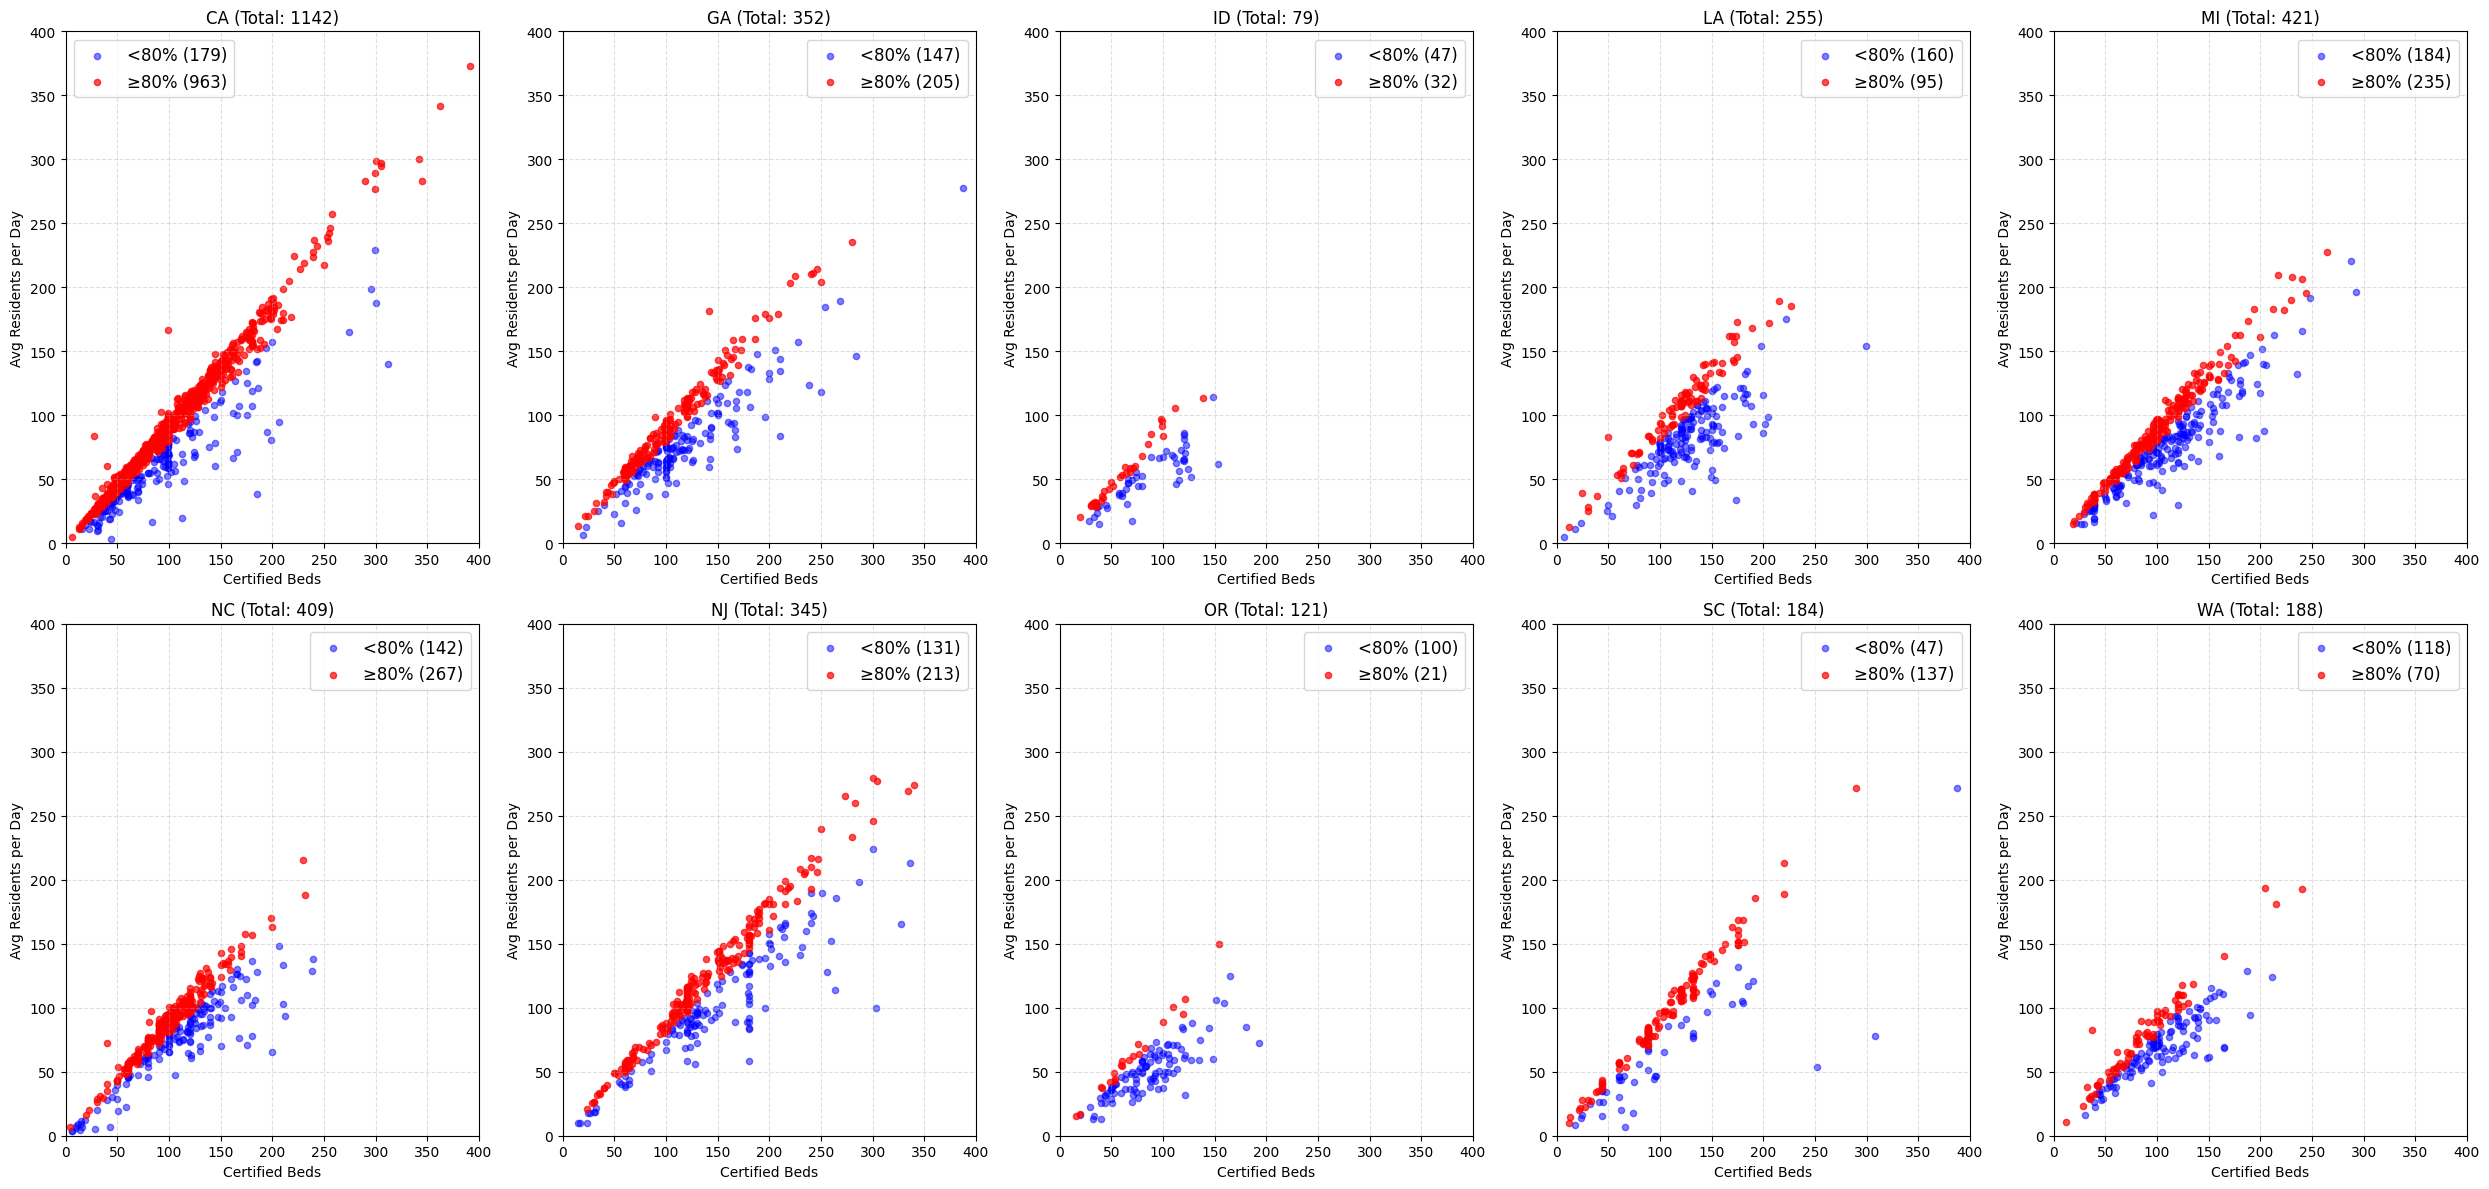

In [391]:
pbj_provider = pbj_provider.drop_duplicates(subset=['PROVNUM'])
pbj_provider['Occupancy Rate'] = pbj_provider['Average Number of Residents per Day'] / pbj_provider['Number of Certified Beds']

unique_states = sorted(pbj_provider['STATE'].unique())
rows, cols = 2, 5
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(25, 12))
axes = axes.flatten()

x_lim = (0, 400)
y_lim = (0, 400)

for ax, state in zip(axes, unique_states):
    state_df = pbj_provider[pbj_provider['STATE'] == state]
    above_80 = state_df[state_df['Occupancy Rate'] >= 0.8]
    below_80 = state_df[state_df['Occupancy Rate'] < 0.8]
    total_facilities = len(state_df)
    above_80_count = len(above_80)
    below_80_count = len(below_80)

    ax.scatter(
        below_80['Number of Certified Beds'], below_80['Average Number of Residents per Day'],
        color='blue', alpha=0.5, s=20, label=f'<80% ({below_80_count})'
    )
    ax.scatter(
        above_80['Number of Certified Beds'], above_80['Average Number of Residents per Day'],
        color='red', alpha=0.7, s=20, label=f'≥80% ({above_80_count})'
    )

    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)
    ax.set_title(f'{state} (Total: {total_facilities})', fontsize=12)
    ax.set_xlabel('Certified Beds')
    ax.set_ylabel('Avg Residents per Day')
    ax.legend(fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

---
## Observations from the Scatter Plots
Across all states, a strong positive linear relationship between the number of certified beds and residents per day is evident—supporting the validity of the occupancy metric.

Facilities with very high certified bed counts (200+) are still reaching high occupancy, especially in CA and NJ, suggesting that even large institutions are not immune to staffing pressures.

Some smaller facilities in GA and SC also operate at near full capacity, highlighting the need for targeted interventions even at lower bed counts.
States like CA, SC, NC, and NJ show clear signs of operational strain and should be prioritized by sales teams for outreach. These facilities represent both the highest need for staffing support and the most compelling value proposition for Clipboard’s flexible contract solutions.

In contrast, states like OR, ID, and WA may benefit from a more exploratory or educational approach, as they show potential for preemptive engagement rather than urgent reinforcement.

Below I am creating a table that outlines these high occupancy facilities and can give the sales team direct insights with the state of New Jersey.

In [394]:
nj_high_occupancy = pbj_provider[(pbj_provider['STATE'] == 'NJ') & (pbj_provider['Occupancy Rate'] >= 0.8)]

nj_high_occupancy_list = nj_high_occupancy[['PROVNUM', 'PROVNAME','Facility Type', 'CITY', 'STATE', 'COUNTY_NAME', 
                                                  'Occupancy Rate', 'Number of Certified Beds', 
                                                  'Average Number of Residents per Day', 'Overall Rating']]

nj_high_occupancy_list.head(10)

,PROVNUM,PROVNAME,Facility Type,CITY,STATE,COUNTY_NAME,Occupancy Rate,Number of Certified Beds,Average Number of Residents per Day,Overall Rating
158886,315002,CAREONE AT SOMERSET VALLEY,Unknown,BOUND BROOK,NJ,Somerset,0.848437,64.0,54.3,4.0
158977,315005,SPRING GROVE REHABILITATION AND HEALTHCARE CENTER,Rehabilitation Center,NEW PROVIDENCE,NJ,Union,0.883019,106.0,93.6,3.0
159068,315008,LAUREL MANOR HEALTHCARE AND REHABILITATION CENTER,Rehabilitation Center,STRATFORD,NJ,Camden,0.902830,106.0,95.7,3.0
159159,315009,RUNNELLS CENTER FOR REHABILITATION & HEALTHCARE,Rehabilitation Center,BERKELEY HEIGHTS,NJ,Union,0.819333,300.0,245.8,3.0
159250,315010,ELMORA HILLS HEALTH & REHABILITATION CENTER,Rehabilitation Center,ELIZABETH,NJ,Union,0.925000,200.0,185.0,2.0
159341,315013,BARCLAYS REHABILITATION AND HEALTHCARE CENTER,Rehabilitation Center,CHERRY HILL,NJ,Camden,0.872222,108.0,94.2,2.0
159432,315014,BIG OAK REHABILITATION AND HEALTHCARE CENTER,Rehabilitation Center,PITTSGROVE,NJ,Salem,0.863095,84.0,72.5,1.0
159705,315019,DWELLING PLACE AT ST CLARES,General Healthcare,DOVER,NJ,Morris,0.910714,28.0,25.5,4.0
159796,315021,ATLAS HEALTHCARE AT DAUGHTERS OF MIRIAM,General Healthcare,CLIFTON,NJ,Passaic,0.923333,210.0,193.9,2.0
160069,315036,ARBOR GLEN CENTER,Unknown,CEDAR GROVE,NJ,Essex,0.945902,122.0,115.4,4.0


---
## High Occupancy Trends Continued
While the scatter plot has shown how high occupancy distributes in relation to the number of certified beds, it’s equally important to analyze the proportional breakdown of occupancy levels within each state.

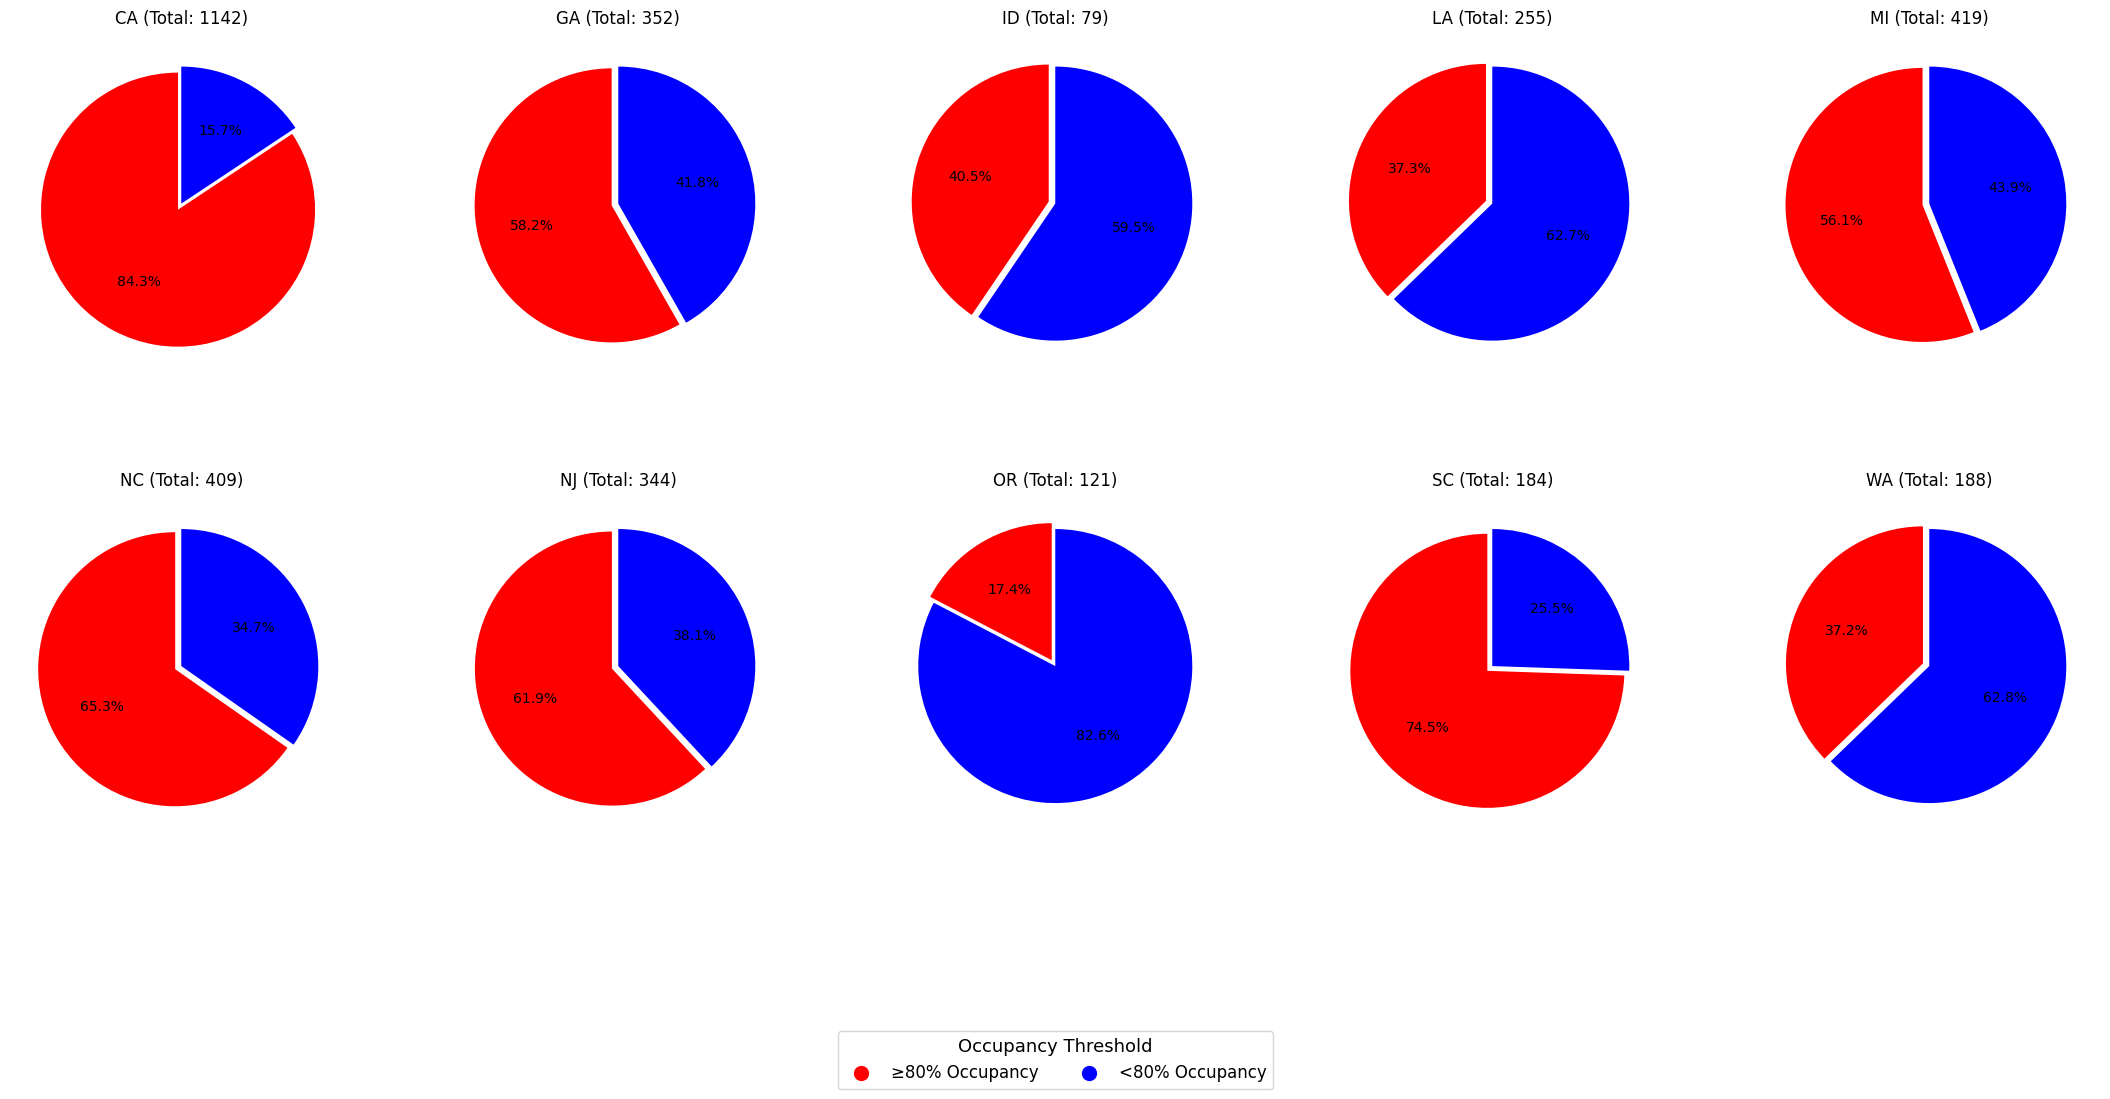

In [397]:
unique_states = sorted(pbj_provider['STATE'].unique())
rows, cols = 2, 5
fig, axes = plt.subplots(rows, cols, figsize=(22, 10))
axes = axes.flatten()

labels = ['≥80% Occupancy', '<80% Occupancy']
colors = ['red', 'blue']
explode = (0.05, 0) 

for ax, state in zip(axes, unique_states):
    state_df = pbj_provider[pbj_provider['STATE'] == state]

    high_occ_count = (state_df['Occupancy Rate'] >= 0.8).sum()
    low_occ_count = (state_df['Occupancy Rate'] < 0.8).sum()
    sizes = [high_occ_count, low_occ_count]

    ax.pie(
        sizes,
        labels=None,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,
        explode=explode,
        textprops={'fontsize': 10}
    )
    ax.set_title(f'{state} (Total: {high_occ_count + low_occ_count})', fontsize=12)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=label,
           markerfacecolor=color, markersize=12)
    for label, color in zip(labels, colors)
]

fig.legend(
    handles=legend_elements,
    loc='lower center',
    ncol=2,
    fontsize=12,
    title='Occupancy Threshold',
    title_fontsize=13,
    bbox_to_anchor=(0.5, -0.08)
)

plt.tight_layout()
plt.subplots_adjust(hspace = 0.35, bottom=0.18) 
plt.show()

---
## General Trends
California (CA) stands out dramatically, with over 84% of facilities operating at ≥80% occupancy. This aligns with the earlier finding that California is both the largest and one of the most overstretched healthcare markets.

States like South Carolina (SC), North Carolina (NC), and New Jersey (NJ) also show significantly high occupancy burdens, with over 60% of facilities in each state surpassing the 80% occupancy threshold.

Conversely, Oregon (OR) presents a notable outlier: despite its increasing demand, only 17.4% of facilities hit high occupancy levels—suggesting potentially underutilized capacity or more effective resource distribution.
Idaho (ID) and Louisiana (LA) show lower pressure overall, with the majority of facilities operating below the 80% mark, which may indicate less immediate demand for additional staffing.

States like CA, SC, NC, and NJ show clear signs of operational strain and should be prioritized by sales teams for outreach. These facilities represent both the highest need for staffing support and the most compelling value proposition for Clipboard’s flexible contract solutions.

In contrast, states like OR, ID, and WA may benefit from a more exploratory or educational approach, as they show potential for preemptive engagement rather than urgent reinforcement.

---
## Identifying the Facility Type based on Occupancy Levels
To better understand which types of facilities are consistently operating at or above full capacity, I analyzed occupancy rates by facility type. The facility type column categorizes each facility (e.g., Rehabilitation Center, Care Center, General Healthcare), and is used to identify which categories most often reach ≥80% occupancy.

This helps highlight where demand may be outpacing capacity, and can guide further investigation into resource allocation, staffing needs, or potential service gaps.

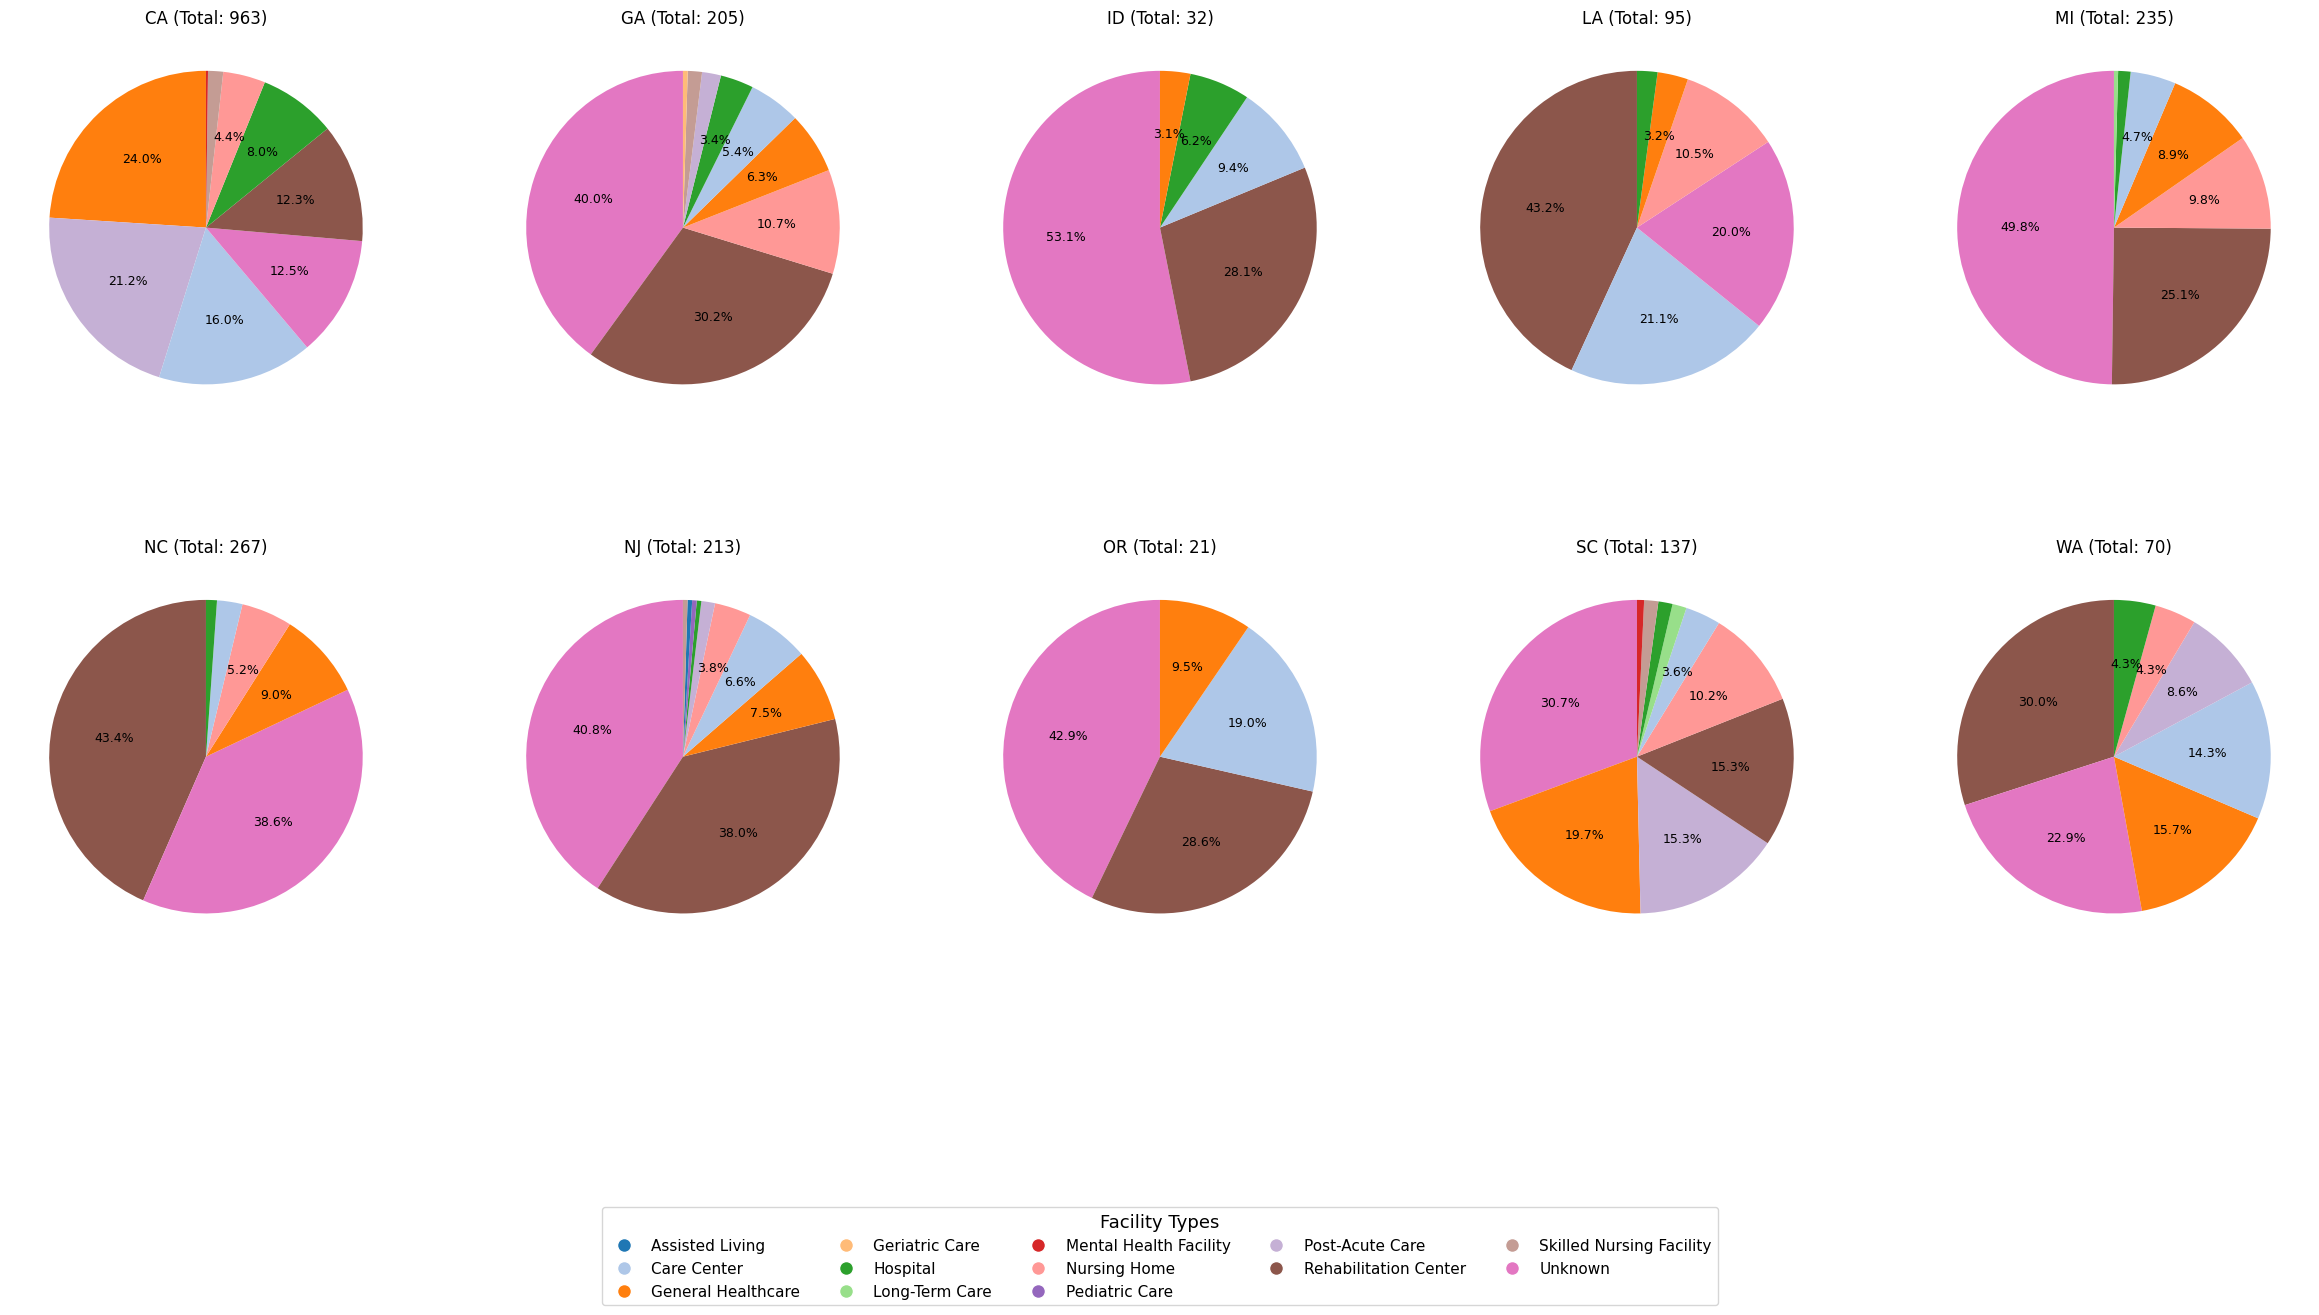

In [401]:
pbj_provider = pbj_provider.drop_duplicates(subset=['PROVNUM'])
high_occ_df = pbj_provider[pbj_provider['Occupancy Rate'] >= 0.8]

unique_states = sorted(high_occ_df['STATE'].unique())
rows, cols = 2, 5
fig, axes = plt.subplots(rows, cols, figsize=(24, 12))
axes = axes.flatten()

facility_types = sorted(high_occ_df['Facility Type'].dropna().unique())
color_palette = plt.get_cmap('tab20').colors
color_dict = {ftype: color_palette[i % len(color_palette)] for i, ftype in enumerate(facility_types)}

def autopct_threshold(pct):
    return f'{pct:.1f}%' if pct >= 3 else ''

for ax, state in zip(axes, unique_states):
    state_df = high_occ_df[high_occ_df['STATE'] == state]
    type_counts = state_df['Facility Type'].value_counts()

    if type_counts.empty:
        ax.axis('off')
        continue

    labels = type_counts.index
    sizes = type_counts.values
    colors = [color_dict[label] for label in labels]

    wedges, texts, autotexts = ax.pie(
        sizes,
        labels=None,  
        colors=colors,
        autopct= autopct_threshold,
        startangle=90,
        textprops={'fontsize': 9}
    )

    ax.set_title(f'{state} (Total: {sum(sizes)})', fontsize=12)

handles = [
    plt.Line2D([0], [0], marker='o', color='w', label=ftype,
               markerfacecolor=color_dict[ftype], markersize=10)
    for ftype in facility_types
]

fig.legend(
    handles=handles,
    loc='lower center',
    ncol=5,
    fontsize=11,
    title="Facility Types",
    title_fontsize=13,
    bbox_to_anchor=(0.5, -0.08)
)

plt.tight_layout()
plt.subplots_adjust(hspace = 0.35, bottom=0.22)
plt.show()

## Key Insights:

## Dominance of Skilled Nursing Facilities
Across nearly all states, Skilled Nursing Facilities (brown slice) consistently make up the largest share of high-occupancy institutions:

- NC (43.4%), LA (43.2%), CA (24.0%), WA (30.0%), and MI (25.1%) show a strong presence of this facility type.

This suggests that Skilled Nursing Facilities are regularly operating near or at capacity, pointing to higher demand and potential staffing shortages — especially in states like NC and LA.

## Nursing Homes Are a Close Second
States like GA (30.2%), NJ (38.0%), and ID (28.1%) show a notable presence of Nursing Homes in the high occupancy group. This aligns with the aging population and highlights long-term care facilities as consistent pressure points.

## Post-Acute and General Healthcare Stand Out in CA and SC
Post-Acute Care (purple) is significant in CA (21.2%) and SC (15.3%).
General Healthcare facilities are notably present in CA (16.0%), SC (19.7%), and OR (9.5%).
These indicate that in certain states, even general medical and transitional care settings are nearing full occupancy, which is less common nationally.

## The “Unknown” Category
The “Unknown” category still has room for potential and key insights but the approach worked very well for the state of California, enabling me to see the spread of healthcare facilities.
As mentioned earlier, this is due to facilities where no clear categorization could be assigned through name parsing. This limits the full interpretability of the data — but can be improved with further manual verification or by scraping data from CMS/NPI databases using the facility ID or name.

---
## Including the Ownership Type of each Facility
These charts represent institutions experiencing high occupancy rates (≥80%), broken down by ownership type across the targeted states. While detailed facility type information may be limited or inconsistent, ownership type is consistently available, making it a reliable lens through which to understand operational pressures.

By analyzing which ownership models (e.g., For-profit, Non-profit, Corporation, LLC) are most associated with high occupancy, we gain valuable insight into:

- Who is most affected by overcapacity issues

- How organizational structure may influence resource strain or staff turnover

Even in the absence of precise facility classifications, ownership type serves as a proxy for understanding the business models driving operations — allowing us to identify where support, funding, or staffing interventions may be most needed.

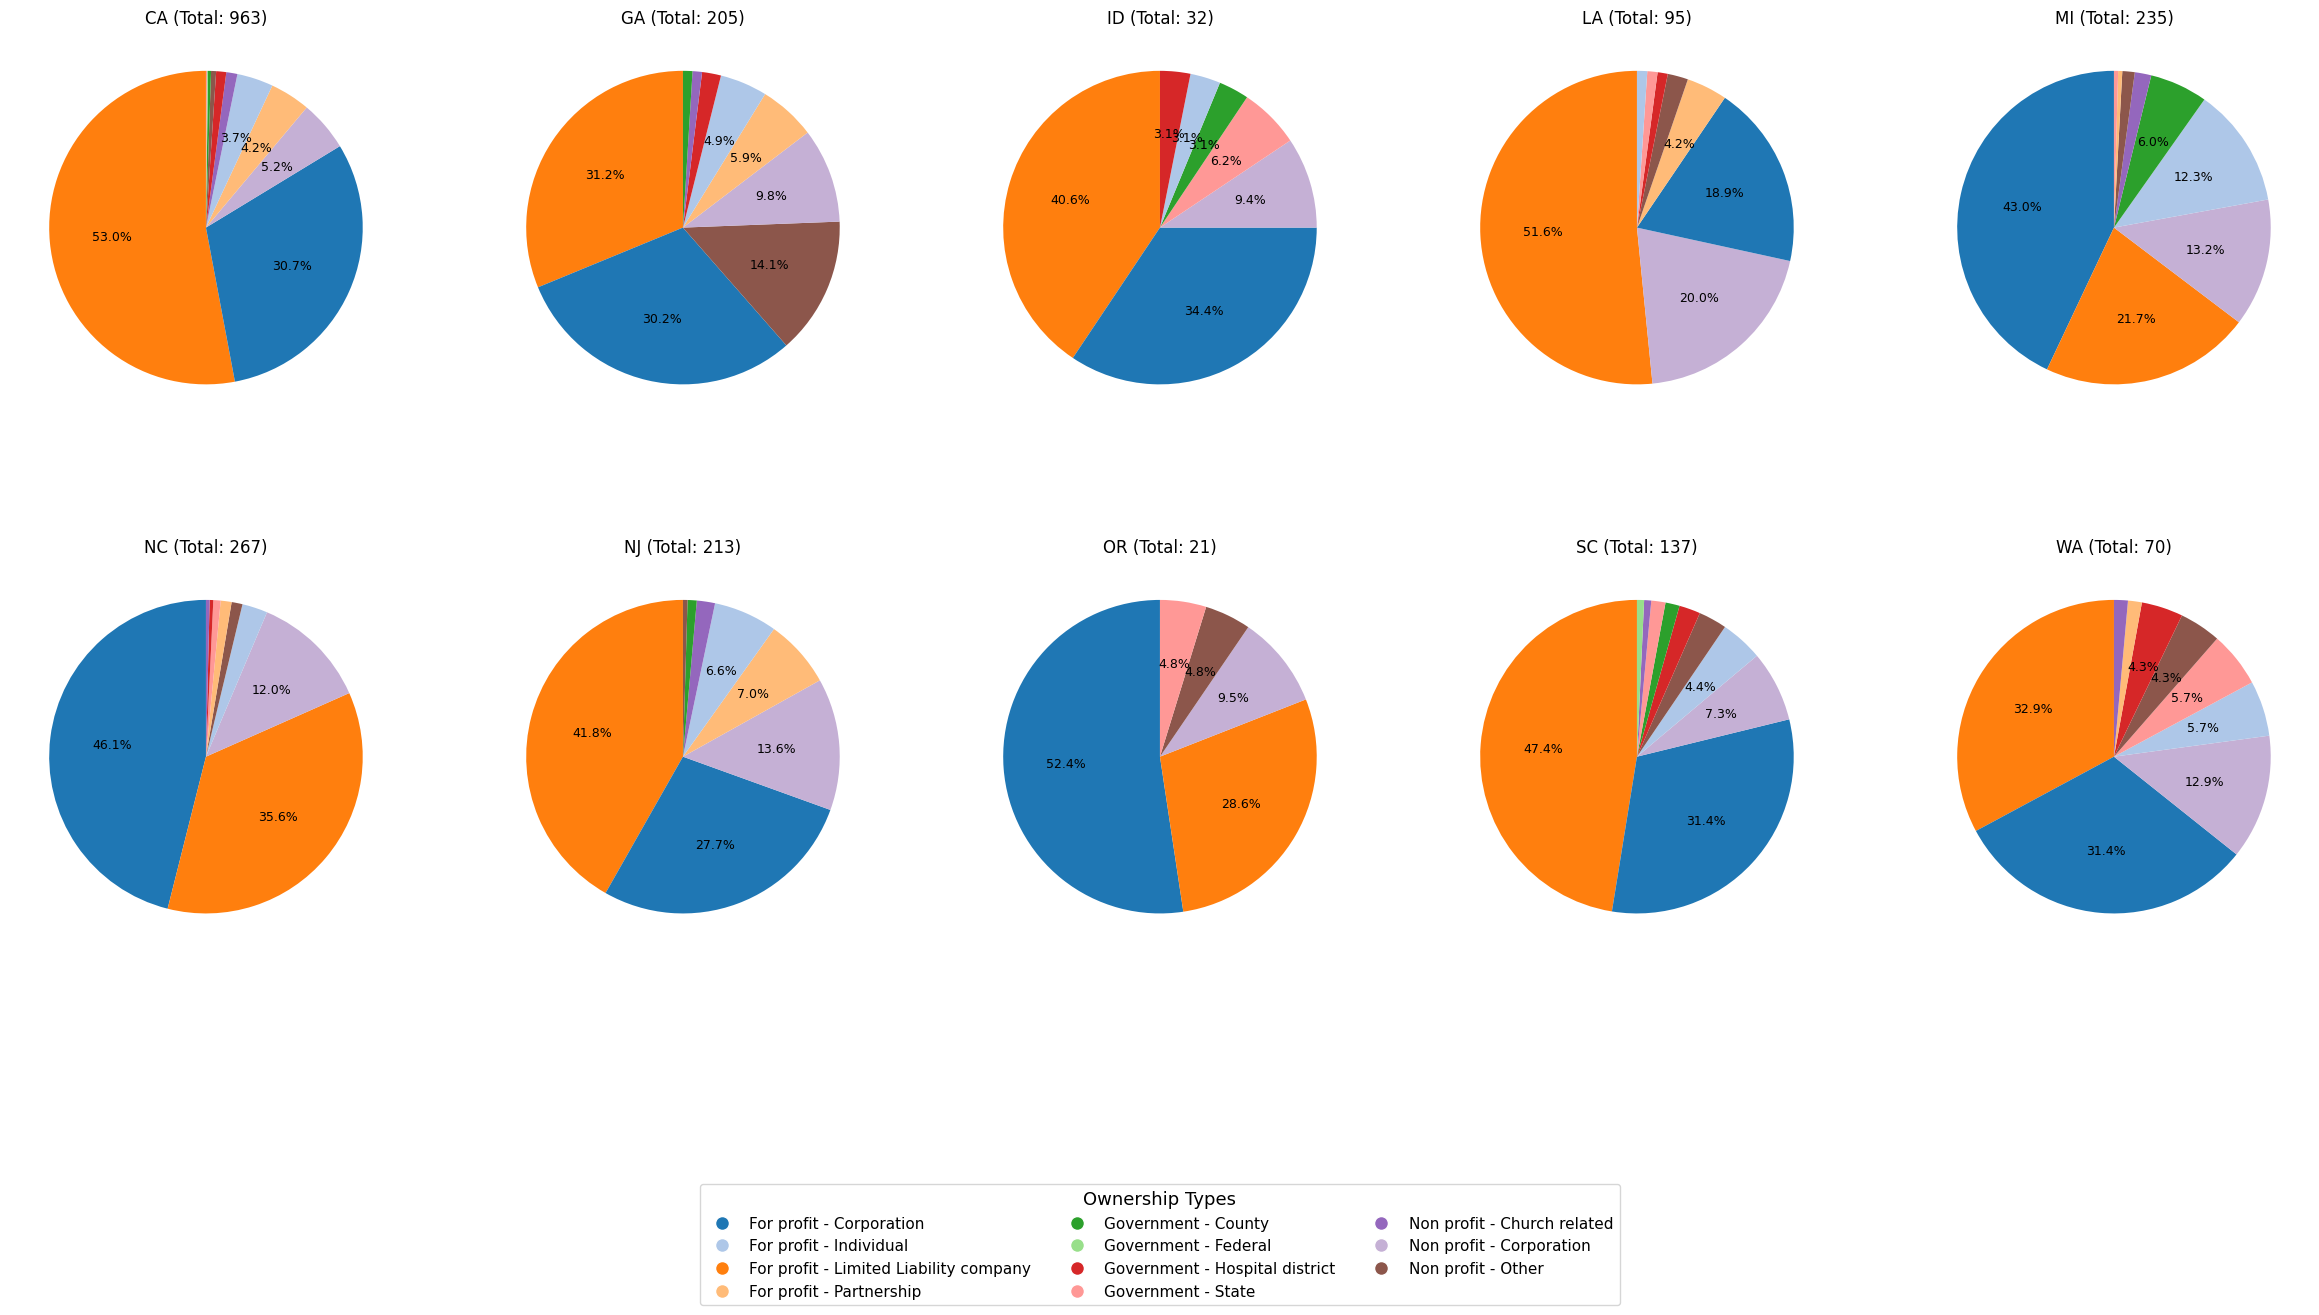

In [405]:
unique_states = sorted(high_occ_df['STATE'].unique())
rows, cols = 2, 5
fig, axes = plt.subplots(rows, cols, figsize=(24, 12))
axes = axes.flatten()

ownership_types = sorted(high_occ_df['Ownership Type'].dropna().unique())
color_palette = plt.get_cmap('tab20').colors 
color_dict = {otype: color_palette[i % len(color_palette)] for i, otype in enumerate(ownership_types)}

def autopct_threshold(pct):
    return f'{pct:.1f}%' if pct >= 3 else ''
    
for ax, state in zip(axes, unique_states):
    state_df = high_occ_df[high_occ_df['STATE'] == state]
    type_counts = state_df['Ownership Type'].value_counts()

    if type_counts.empty:
        ax.axis('off')
        continue

    labels = type_counts.index
    sizes = type_counts.values
    colors = [color_dict[label] for label in labels]

    wedges, texts, autotexts = ax.pie(
        sizes,
        labels=None,  
        colors=colors,
        autopct=autopct_threshold,
        startangle=90,
        textprops={'fontsize': 9}
    )

    ax.set_title(f'{state} (Total: {sum(sizes)})', fontsize=12)

handles = [
    plt.Line2D([0], [0], marker='o', color='w', label=otype,
               markerfacecolor=color_dict[otype], markersize=10)
    for otype in ownership_types
]

fig.legend(
    handles=handles,
    loc='lower center',
    ncol=3,
    fontsize=11,
    title="Ownership Types",
    title_fontsize=13,
    bbox_to_anchor=(0.5, -0.08)
)

plt.tight_layout()
plt.subplots_adjust(hspace =0.35, bottom=0.22)
plt.show()

## General Trends
- For profit - Corporation and For profit - Individual are the two most common ownership types across nearly all states.

- Non-profit and Government-owned facilities make up a smaller but still significant portion, varying by state.

## Notable Observations
- States like NC, OR, and MI lean more heavily toward Corporation ownership.

- States like CA, LA, SC, NJ, and ID are dominated by Individual ownership.

- LA and MI show a stronger presence of Non-profit - Church related institutions than others.

- Government ownership exists in small proportions across several states but is rarely dominant.

---
# Reccomendation 3: Targeting High-Occupancy Facilities
A review of facilities across multiple states reveals several consistent trends that highlight where staffing efforts should be prioritized. High demand is evident, with a significant number of facilities—particularly in states like California, South Carolina, North Carolina, and New Jersey—operating at or above 80% occupancy. This indicates ongoing or imminent strain on staffing resources.

The landscape is largely dominated by for-profit ownership, especially facilities owned by individuals and corporations. These types of facilities tend to operate on tighter budgets, making them more susceptible to the impact of staff shortages, while also being more flexible and responsive when it comes to implementing staffing solutions. Additionally, high-occupancy facilities are frequently concentrated in a few core categories such as Skilled Nursing, Assisted Living, and Memory Care. These settings are labor-intensive and require specialized staff, and in many states, just two to three of these facility types account for as much as 60–80% of the total.

# Top 3 States to Target (Based on High Occupancy):
## 1. California (CA)
- Occupancy: 84.3% of facilities are ≥80% full (Extremely high demand due to high occupancy).

- Ownership Type: Dominated by For-profit Individual (53%) and Corporation (31%). Privately owned facilities suggest more flexible staffing decisions.

- Facility Type: Spread out but largest share in Residential care (24%), Skilled Nursing (21%), and Assisted Living (16%).

## 2. South Carolina (SC)
- Occupancy: 74.5% ≥80% occupancy — among the highest.

- Ownership Type: Mostly For-profit Individual (47%) and Corporation (31%). High occupancy and privately owned structure create pressure to retain staff.

- Facility Type: Fairly concentrated across Skilled Nursing, Assisted Living, and Memory Care.

## 3. New Jersey (NJ)
- Occupancy: 61.9% of facilities are ≥80% full.

- Ownership Type: Strong presence of For-profit Individual (42%) and Corporation (28%). Clear concentration in two key facility types makes targeted staffing more efficient.

- Facility Type: Dominated by Skilled Nursing (40.8%) and Assisted Living (38%). High private ownership simplifies implementation.

---

## Joining Information from Survey Summary Data and Medicare Claims Table 
To enrich the PBJ provider data and enable a more comprehensive analysis, I merged it with two additional datasets: the Survey Summary and Medicare Claims tables. These merges were performed using the common identifier PROVNUM, which uniquely represents each facility. By incorporating key metrics such as the Total Number of Health Deficiencies, Fire Safety Deficiencies, Adjusted Score and Expected Score, I aim to uncover deeper patterns related to facility performance, quality of care, and operational strain. This unified dataset will allow me to investigate whether factors like high occupancy and ownership structure, correlate with staff turnover, rating discrepancies, or regulatory deficiencies.

In [410]:
survey_summary = pd.read_csv('/Users/oliverbohler/Desktop/Clipboard Health/NH_SurveySummary_Feb2025.csv')
medicare_claims = pd.read_csv('/Users/oliverbohler/Desktop/Clipboard Health/NH_QualityMsr_Claims_Feb2025.csv')

In [412]:
survey_summary.rename(columns={'CMS Certification Number (CCN)': 'PROVNUM'}, inplace=True)

pbj_provider_summary = pbj_provider.merge(
    survey_summary[['PROVNUM', 'Total Number of Health Deficiencies', 'Total Number of Fire Safety Deficiencies']],
    on='PROVNUM',
    how='left'
)

In [414]:
medicare_claims.rename(columns={'CMS Certification Number (CCN)': 'PROVNUM'}, inplace=True)
pbj_provider_summary_claims = pbj_provider_summary.merge(
    medicare_claims[['PROVNUM', 'Adjusted Score', 'Expected Score', 'Resident type']],
    on='PROVNUM',
    how='left'
)

In [416]:
pbj_provider_summary_claims.head()

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,Day_Name,MDScensus,Hrs_RNDON,Hrs_RNDON_emp,Hrs_RNDON_ctr,Hrs_RNadmin,Hrs_RNadmin_emp,Hrs_RNadmin_ctr,Hrs_RN,Hrs_RN_emp,Hrs_RN_ctr,Hrs_LPNadmin,Hrs_LPNadmin_emp,Hrs_LPNadmin_ctr,Hrs_LPN,Hrs_LPN_emp,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr,Number of Certified Beds,Average Number of Residents per Day,Overall Rating,Total nursing staff turnover,Ownership Type,Legal Business Name,Facility Type,Occupancy Rate,Total Number of Health Deficiencies,Total Number of Fire Safety Deficiencies,Adjusted Score,Expected Score,Resident type
0,055001,REDLANDS HEALTHCARE CENTER,REDLANDS,CA,San Bernardino,71,2024Q2,2024-04-01,Monday,74,8.0,8.0,0.0,0.0,0.0,0.0,25.82,25.82,0.0,0.0,0.0,0.0,78.78,78.78,0.0,180.57,180.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,75.1,4.0,52.3,For profit - Limited Liability company,ASH HOLDINGS LLC,General Healthcare,0.962821,5.0,8.0,19.480391,26.319904,Short Stay
1,055001,REDLANDS HEALTHCARE CENTER,REDLANDS,CA,San Bernardino,71,2024Q2,2024-04-01,Monday,74,8.0,8.0,0.0,0.0,0.0,0.0,25.82,25.82,0.0,0.0,0.0,0.0,78.78,78.78,0.0,180.57,180.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,75.1,4.0,52.3,For profit - Limited Liability company,ASH HOLDINGS LLC,General Healthcare,0.962821,5.0,8.0,15.690286,11.381293,Short Stay
2,055001,REDLANDS HEALTHCARE CENTER,REDLANDS,CA,San Bernardino,71,2024Q2,2024-04-01,Monday,74,8.0,8.0,0.0,0.0,0.0,0.0,25.82,25.82,0.0,0.0,0.0,0.0,78.78,78.78,0.0,180.57,180.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,75.1,4.0,52.3,For profit - Limited Liability company,ASH HOLDINGS LLC,General Healthcare,0.962821,5.0,8.0,1.717367,1.718290,Long Stay
3,055001,REDLANDS HEALTHCARE CENTER,REDLANDS,CA,San Bernardino,71,2024Q2,2024-04-01,Monday,74,8.0,8.0,0.0,0.0,0.0,0.0,25.82,25.82,0.0,0.0,0.0,0.0,78.78,78.78,0.0,180.57,180.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,75.1,4.0,52.3,For profit - Limited Liability company,ASH HOLDINGS LLC,General Healthcare,0.962821,5.0,8.0,1.974407,1.484581,Long Stay
4,055001,REDLANDS HEALTHCARE CENTER,REDLANDS,CA,San Bernardino,71,2024Q2,2024-04-01,Monday,74,8.0,8.0,0.0,0.0,0.0,0.0,25.82,25.82,0.0,0.0,0.0,0.0,78.78,78.78,0.0,180.57,180.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,75.1,4.0,52.3,For profit - Limited Liability company,ASH HOLDINGS LLC,General Healthcare,0.962821,9.0,7.0,19.480391,26.319904,Short Stay


## Investigating Score Discrepancies Across States
In this section, I analyze the gap between Adjusted Scores and Expected Scores for nursing facilities. A significant gap may indicate a discrepancy between how a facility is expected to perform and how it actually performs based on claims data. By creating a has_big_gap flag for facilities with a gap ≥7 points, I am able to visualize where these discrepancies are concentrated across states. This allows for the identification of states with the highest number of facilities exhibiting unexpectedly poor performance or underreporting issues. These insights can help prioritize auditing efforts, uncover systemic problems, or highlight areas where facilities might require additional support or oversight.

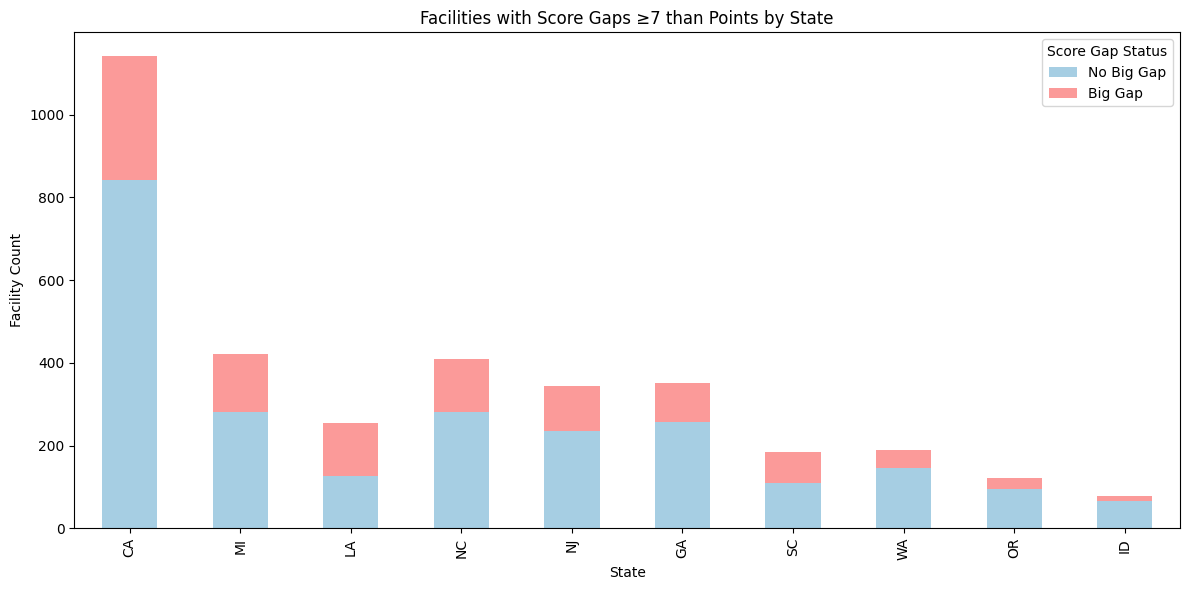

In [419]:
unique_facilities = pbj_provider_summary_claims.drop_duplicates(subset='PROVNUM').copy()
unique_facilities['score_gap'] = abs(unique_facilities['Adjusted Score'] - unique_facilities['Expected Score'])

gap_threshold = 7
unique_facilities['has_big_gap'] = unique_facilities['score_gap'] >= gap_threshold

state_gap_counts = (
    unique_facilities.groupby(['STATE', 'has_big_gap'])
    .size()
    .unstack(fill_value=0)
    .rename(columns={True: 'Big Gap', False: 'No Big Gap'})
)

# Plot
state_gap_counts.sort_values('Big Gap', ascending=False).plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=['#a6cee3', '#fb9a99']
)
plt.title('Facilities with Score Gaps ≥7 than Points by State')
plt.ylabel('Facility Count')
plt.xlabel('State')
plt.legend(title='Score Gap Status')
plt.tight_layout()
plt.show()


## Key Insights:
## California Stands Out:

- California (CA) has the highest number of facilities overall, and notably, a significant portion of those exhibit large score gaps (≥7 points). This suggests a possible mismatch between reported expectations and actual performance or data quality concerns.

## High Score Gaps in Specific States:

- States like Michigan (MI), Louisiana (LA), North Carolina (NC), and New Jersey (NJ) also show a high concentration of facilities with big gaps. These states may need targeted attention for performance reviews, audit follow-ups, or further investigation.

## Consistent Presence of Gaps Across States:

- Almost every state listed contains a noticeable number of “Big Gap” facilities, indicating that the issue is widespread and not localized to one region.

## Policy & Oversight Opportunity:

- The presence of a large number of facilities with high discrepancies could highlight systemic issues—either in how expectations are set or how outcomes are measured. States with higher counts may benefit from refining reporting procedures or enhancing oversight mechanisms.
---

## Score Gaps by Ownership and Facility Type
To dig deeper into potential causes, I cross-analyzed these gaps with ownership type, focusing on the three most prevalent structures: For-profit Corporations, For-profit Limited Liability Companies, and Non-profit Corporations. This allowed me to explore whether structural differences in governance and incentives may relate to performance misalignment.

Furthermore, because ownership type alone doesn’t provide full operational context, I incorporated facility type into the analysis—specifically Rehabilitation Centers, General Healthcare Facilities, and Care Centers. These represent the most common categories in the dataset and are functionally distinct in how care is delivered and resources are allocated. Analyzing these types allowed for a more nuanced understanding of which types of care environments are more likely to experience score gaps and potential systemic issues.

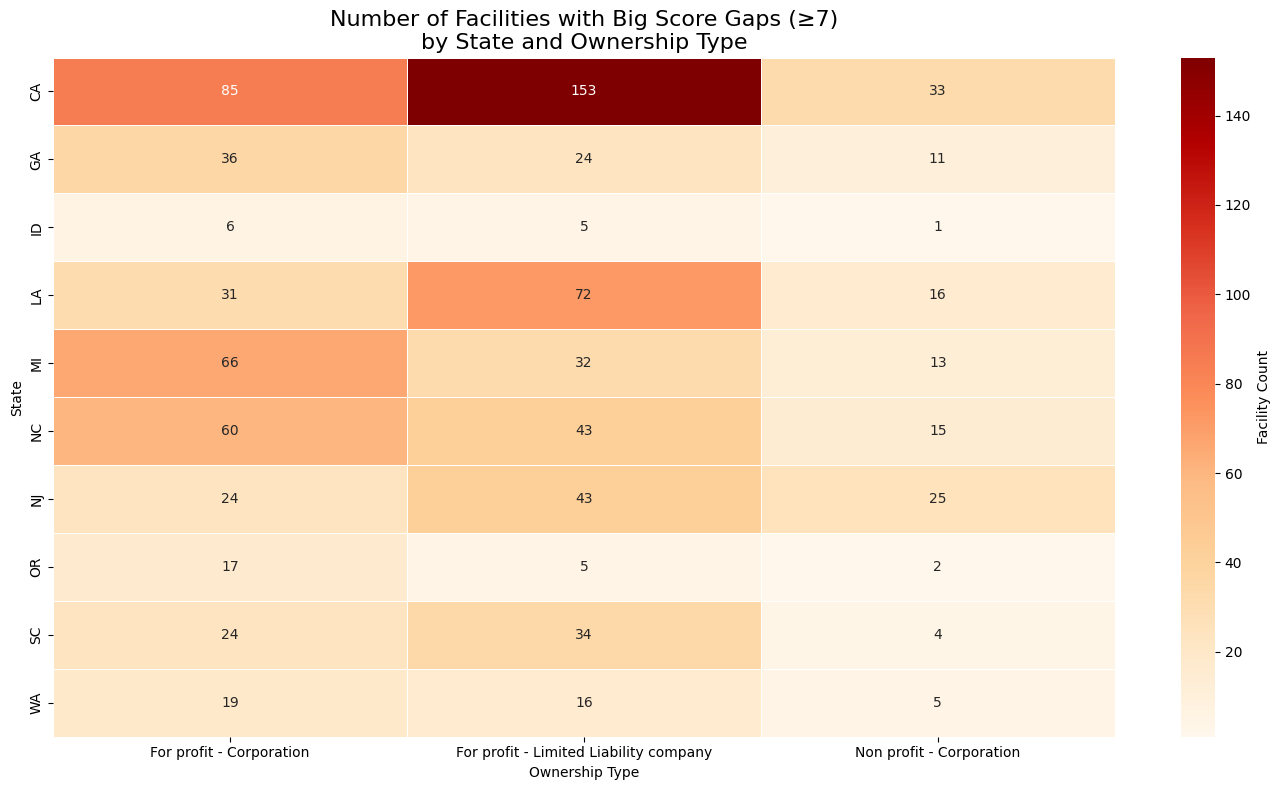

In [423]:
gap_by_state_owner = (
    unique_facilities[unique_facilities['has_big_gap']]
    .groupby(['STATE', 'Ownership Type'])
    .size()
    .unstack(fill_value=0)
)

main_owners = [
    'For profit - Limited Liability company',
    'For profit - Corporation',
    'Non profit - Corporation'
]
gap_by_state_owner = gap_by_state_owner[gap_by_state_owner.columns.intersection(main_owners)]

plt.figure(figsize=(14, 8))
sns.heatmap(
    gap_by_state_owner,
    annot=True,
    fmt='d',
    cmap='OrRd',
    linewidths=0.5,
    cbar_kws={'label': 'Facility Count'}
)
plt.title('Number of Facilities with Big Score Gaps (≥7)\nby State and Ownership Type', fontsize=16)
plt.xlabel('Ownership Type')
plt.ylabel('State')
plt.tight_layout()
plt.show()

## Key Insights
## For-Profit Structures Dominate High Gap Counts

Across nearly every state, for-profit facilities (both Corporations and LLCs) have considerably more large score gap occurrences than non-profit corporations.

This aligns with broader trends in healthcare where profit-oriented institutions may be more sensitive to staffing efficiency or cost-cutting—possibly at the expense of expected performance metrics.

States like NC, GA, and SC also show higher counts among for-profit owners, especially Corporations, but at smaller scales than CA.

This suggests the trend is not isolated to a single region, although scale varies.

---


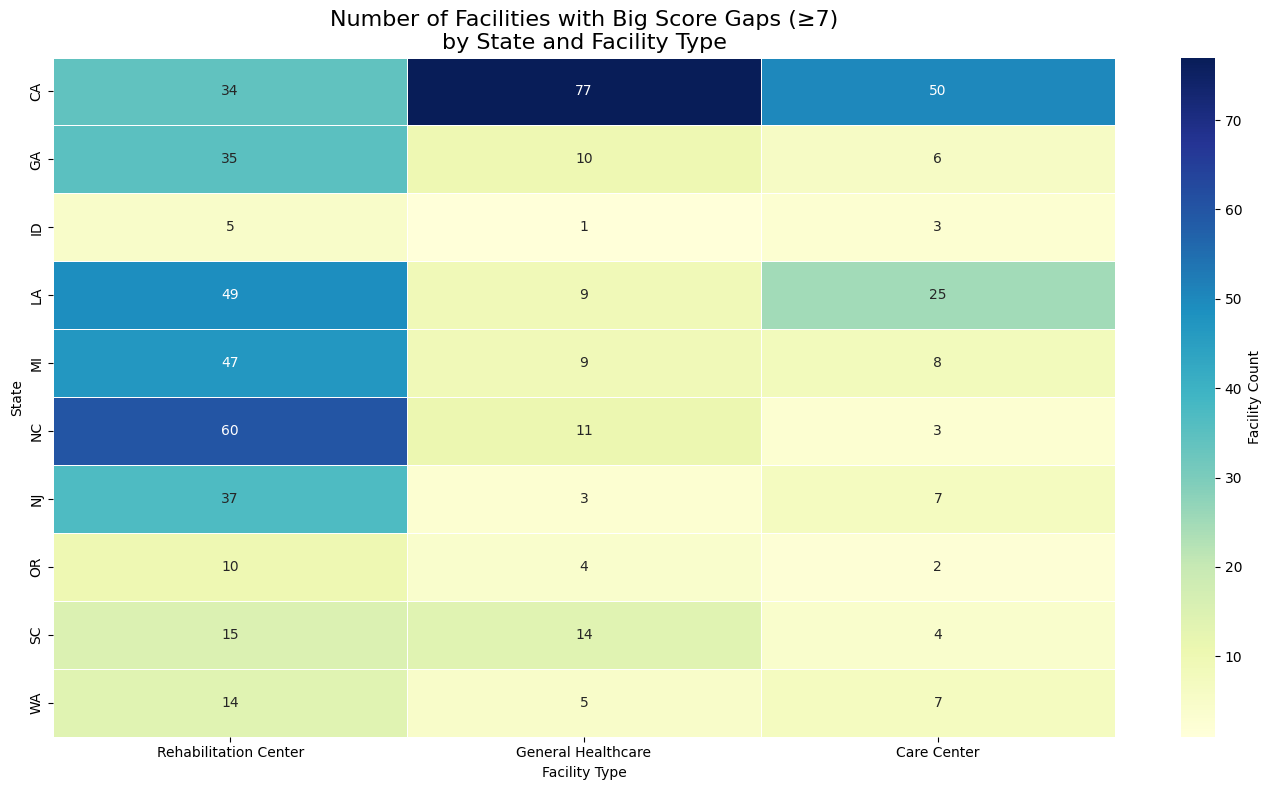

In [426]:
main_facility_types = [
    'Rehabilitation Center',
    'General Healthcare',
    'Care Center'
]

gap_by_type_state = (
    unique_facilities[
        (unique_facilities['has_big_gap']) &
        (unique_facilities['Facility Type'].isin(main_facility_types))
    ]
    .groupby(['STATE', 'Facility Type'])
    .size()
    .unstack(fill_value=0)
)

gap_by_type_state = gap_by_type_state[main_facility_types]

plt.figure(figsize=(14, 8))
sns.heatmap(
    gap_by_type_state,
    annot=True,
    fmt='d',
    cmap='YlGnBu',
    linewidths=0.5,
    cbar_kws={'label': 'Facility Count'}
)
plt.title('Number of Facilities with Big Score Gaps (≥7)\nby State and Facility Type', fontsize=16)
plt.xlabel('Facility Type')
plt.ylabel('State')
plt.tight_layout()
plt.show()

## Key Insights
- General Healthcare Facilities in California Show the Highest Gaps

- California’s General Healthcare facilities stand out with 77 facilities having score gaps ≥7—the highest single value across all states and facility types.

This may indicate issues in traditional full-service facilities, potentially related to staffing, quality expectations, or patient complexity.

Rehabilitation Centers Are Consistently Affected Across States

States like NC (60), LA (49), MI (47), and GA (35) show a recurring high number of score gaps among Rehabilitation Centers.

These facilities may be more sensitive to variations in patient care plans, transitions, or therapy staffing, which can directly influence score discrepancies.

---

## Health Deficiencies Rating
Next the correlation between high occupancy and defficiency ratings was analyzed. Herefore I categorized between high occupancy and normal occupancy rates. However, there are no clear insights that indicate a strong correlation between these factors.

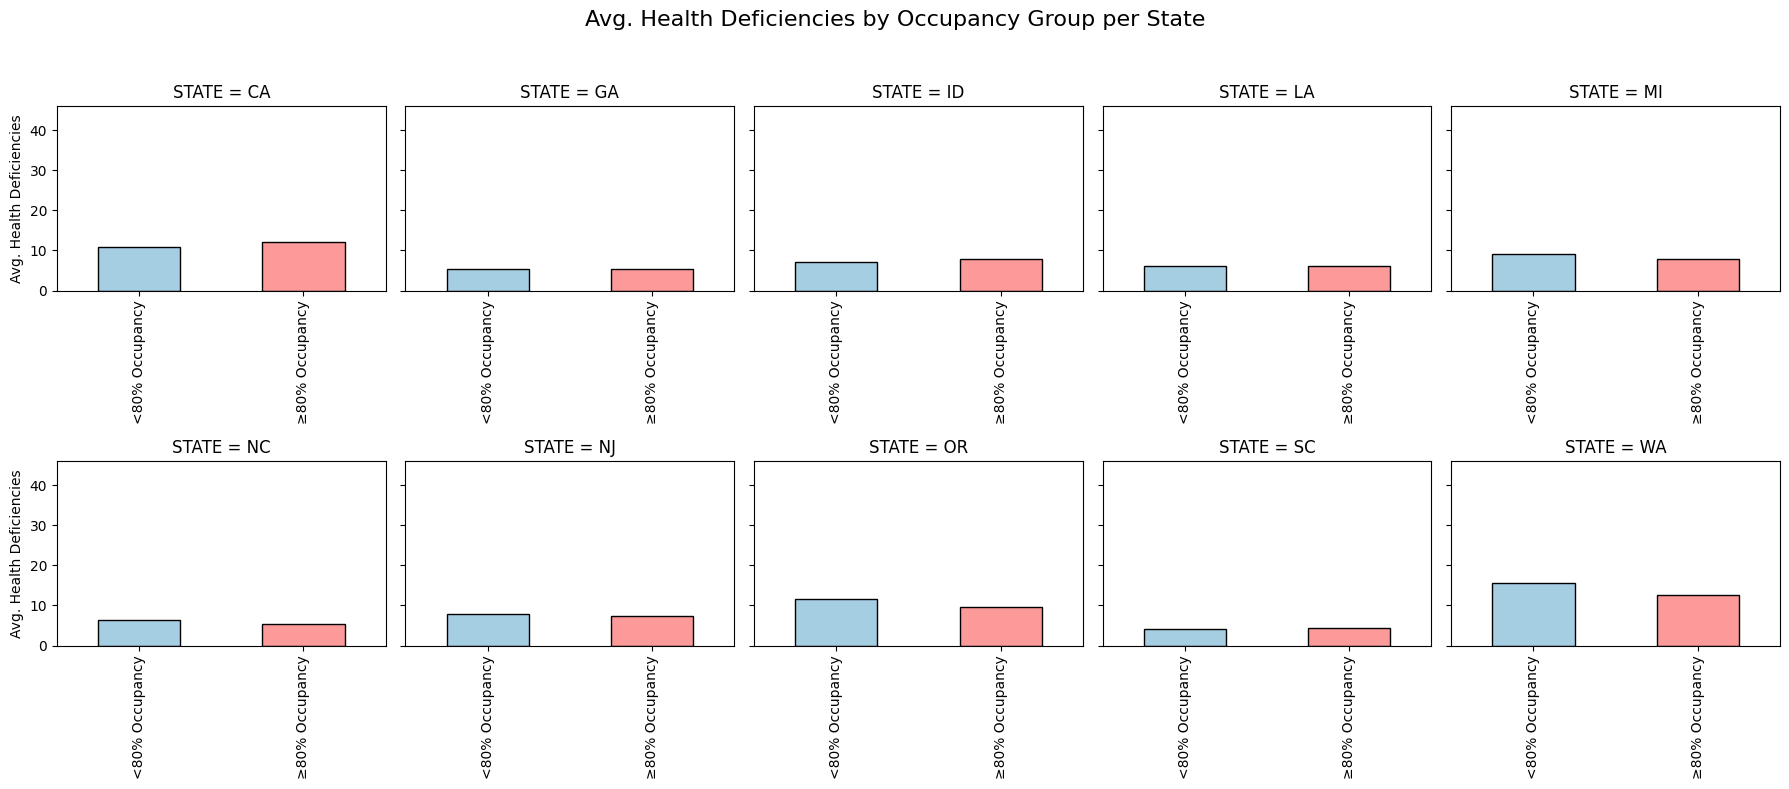

In [430]:
unique_facilities = pbj_provider_summary_claims.drop_duplicates(subset='PROVNUM').copy()
unique_facilities['Occupancy Group'] = unique_facilities['Occupancy Rate'].apply(
    lambda x: '≥80% Occupancy' if x >= 0.80 else '<80% Occupancy'
)

states = unique_facilities['STATE'].unique()
states = sorted(states)
n_cols = 5
n_rows = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 8), sharey=True)
axes = axes.flatten()

for i, state in enumerate(states[:n_cols * n_rows]):
    ax = axes[i]
    data = (
        unique_facilities[unique_facilities['STATE'] == state]
        .groupby('Occupancy Group')['Total Number of Health Deficiencies']
        .mean()
        .round(2)
    )
    data.plot(
        kind='bar',
        color=['#a6cee3', '#fb9a99'],
        edgecolor='black',
        ax=ax
    )
    ax.set_title(f"STATE = {state}")
    ax.set_xlabel('')
    if i % n_cols == 0:
        ax.set_ylabel('Avg. Health Deficiencies')
    else:
        ax.set_ylabel('')
    ax.set_ylim(0, unique_facilities['Total Number of Health Deficiencies'].max() + 2)

fig.suptitle('Avg. Health Deficiencies by Occupancy Group per State', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Nursing Staff Turnover by Ratings
Analyzing the relationship between overall facility ratings and nursing staff turnover rates provides a high-level view of organizational health and workforce stability. Facilities with lower ratings often face systemic challenges that can contribute to higher turnover, such as understaffing, low morale, or poor management practices. By examining turnover across different rating levels, we can begin to identify trends and patterns that suggest whether staffing instability is a potential driver of poor performance or vice versa. This insight is especially valuable for stakeholders aiming to improve care quality, as reducing turnover is both a symptom and a solution to deeper operational issues.

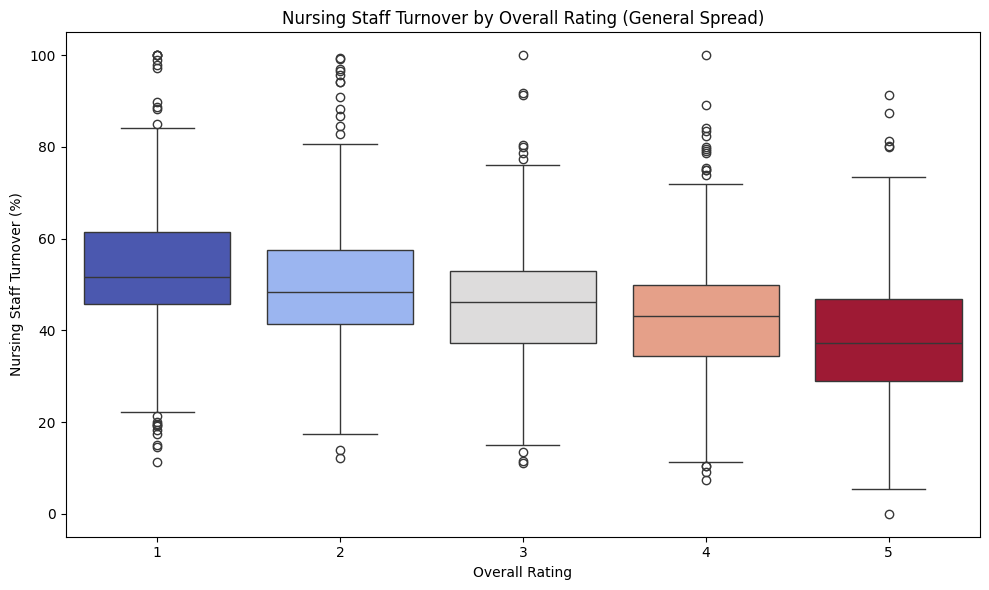

In [433]:
unique_facilities = pbj_provider_summary_claims.drop_duplicates(subset='PROVNUM').copy()

unique_facilities = unique_facilities[
    unique_facilities['Overall Rating'].notna()
]
unique_facilities['Overall Rating'] = unique_facilities['Overall Rating'].astype(int)
unique_facilities = unique_facilities[
    unique_facilities['Overall Rating'].between(1, 5)
]

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=unique_facilities,
    x='Overall Rating',
    y='Total nursing staff turnover',
    hue= 'Overall Rating',
    palette='coolwarm',
    legend = False
)
plt.title('Nursing Staff Turnover by Overall Rating (General Spread)')
plt.xlabel('Overall Rating')
plt.ylabel('Nursing Staff Turnover (%)')
plt.tight_layout()
plt.show()

## Nursing Staff Turnovers Based on Overall Rating State Analysis
These box plots display nursing staff turnover rates (%) for nursing home facilities grouped by their Overall Ratings (1–5) in each state, gaining detailed insights in the correlation between turnover rates and ratings.

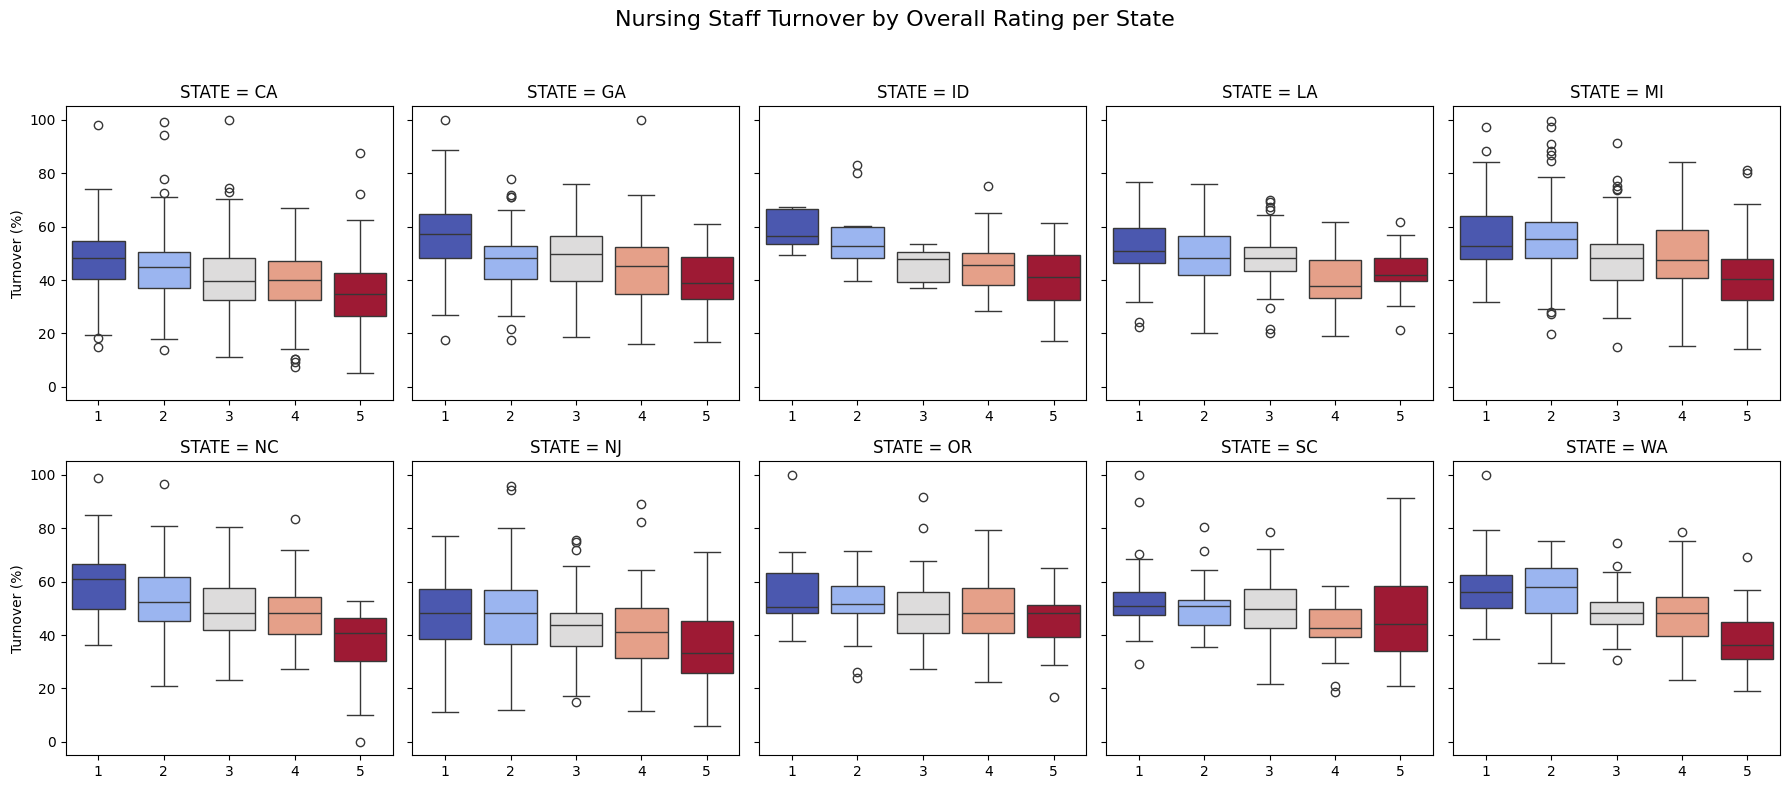

In [436]:
states = sorted(unique_facilities['STATE'].unique())
n_cols = 5
n_rows = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 8), sharey=True)
axes = axes.flatten()

# 4. Plot each state
for i, state in enumerate(states[:n_cols * n_rows]):
    ax = axes[i]
    state_data = unique_facilities[unique_facilities['STATE'] == state]

    sns.boxplot(
        data=state_data,
        x='Overall Rating',
        y='Total nursing staff turnover',
        hue='Overall Rating',
        palette='coolwarm',
        legend=False,
        ax=ax
    )
    ax.set_title(f"STATE = {state}")
    ax.set_xlabel('')
    if i % n_cols == 0:
        ax.set_ylabel('Turnover (%)')
    else:
        ax.set_ylabel('')

# 5. Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# 6. Title and layout
fig.suptitle('Nursing Staff Turnover by Overall Rating per State', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## General Trend Across States:
- Facilities with lower ratings (1 to 3) tend to have higher median turnover rates and greater variability.

- Higher-rated facilities (Ratings 4 and 5) consistently show lower median turnover and tighter interquartile ranges.

- This pattern indicates a negative correlation between overall rating and staff turnover—as ratings increase, turnover tends to decrease.

- States like NC, MI, NJ, and GA show elevated turnover for 1 to 3-star facilities, with medians often above 50%.
These facilities also exhibit greater spread and more outliers, suggesting instability in staffing and potentially poor work environments.

- Even Rating 3, though technically mid-tier, aligns more closely with 1 and 2 in terms of turnover performance.

---
# Recommendation 4: Focus on States with Score Gaps of 7 or more Points and Low Ratings
Facilities with a discrepancy of 7 or more points between their expected and adjusted scores may be signaling deeper quality or reporting issues—especially when these facilities also hold low overall ratings (1–3 stars). By analyzing these overlaps, I identified specific states—such as California, Michigan, and North Carolina—where the problem is most concentrated. These states also exhibit higher levels of nursing staff turnover, particularly in lower-rated institutions, reinforcing concerns around staffing stability and patient care.

In addition, ownership analysis shows that “For-profit – Limited Liability Companies” are often the most associated with score gaps. When layered with facility type, Rehabilitation Centers emerge as the most frequent among high-gap facilities, indicating a potential link between care complexity and quality consistency.

To improve national standards, Clipboard Health's sales tteam should focus on these high-risk intersections of geography, ownership, and facility type.

- California, Michigan, New Jersey and North Carolina have the highest number of facilities with ≥7 point score gaps, many of which are also low-rated and high in staff turnover.

- For-profit – Limited Liability Companies dominate the ownership of facilities with the most significant discrepancies.

- Rehabilitation Centers are the most common facility type among high-gap institutions, suggesting targeted complexity challenges.
